**2023-01-05 `05-Data-Visualization - Day 2 - Plotting With Pandas`**

With Day 1 of MatPlotLib behind, you can begin to see just a bit of the charting capabilities of python.

There is so much more.

On Day 2 we are going to be using Pandas to bring in much more interesting datasets.

In most cases, this would be the method you would bring in small to midsize datasets (through Pandas).

We are going to learn that Pandas has implemented some of Matplotlib, making it even easier to create charts from Pandas Dataframes.

Bottom line: Day 2's class is as much Pandas stuff that you have already done as it is matplotlib, so be up on your merging, renaming, filtering, etc.

**Objectives**

* Create plots using the `DataFrame.plot()` method.
* Explain the advantages and disadvantages of creating charts using the `DataFrame.plot()` method.
* Use Pandas to analyze a complex dataset and chart the visualizations

**Resources**

* [Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Nice 10 min Guide to using Matplotlib with Pandas](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c)


**Presentation**
* [Plotting With Pandas](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/UCB-VIRT-DATA-PT-11-2022-U-LOLC/-/blob/main/slides/Data-05.2_Plotting_With_Pandas.pdf)

# ===========================

### 2.01 Student Do: PyPlot Warmup (0:10)

## Instructions

1. Open the unsolved [activity file](01-Stu_PlotsReview/Unsolved/plot_drills.ipynb), and look at each dataset starter code.

2. Determine what chart or plot best fits with the starter code of each dataset.

3. Complete the code block to create a plot for each of the datasets. Be sure to provide each plot with a title and labels.

## Hint

If you are unsure what type of data is contained in the starter code, print it out!

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# DATA SET 1
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]

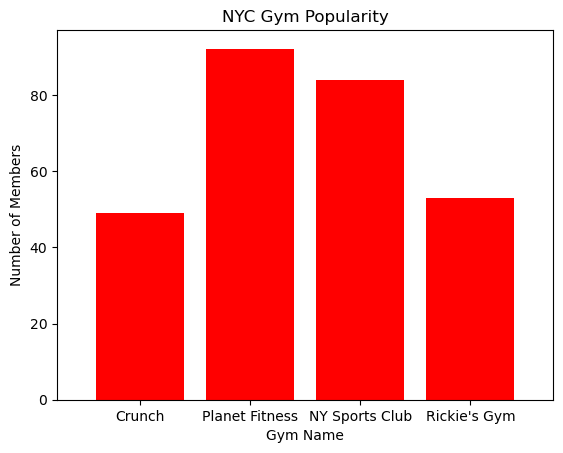

In [3]:
x_axis = np.arange(0, len(gyms))
# tick_locations = [x for x in x_axis]
# tick_locations = [value for value in x_axis]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("NYC Gym Popularity")
plt.xlabel("Gym Name")
plt.ylabel("Number of Members")

plt.xlim(-0.75, len(gyms)-.25)
plt.ylim(0, max(members) + 5)

plt.bar(x_axis, members, facecolor="red", alpha=1, align="center")
plt.xticks(tick_locations, gyms)
plt.show()

In [4]:
# DATA SET 2
x_lim = 2 * np.pi
x_axis = np.arange(0, x_lim, 0.1)
sin = np.sin(x_axis)

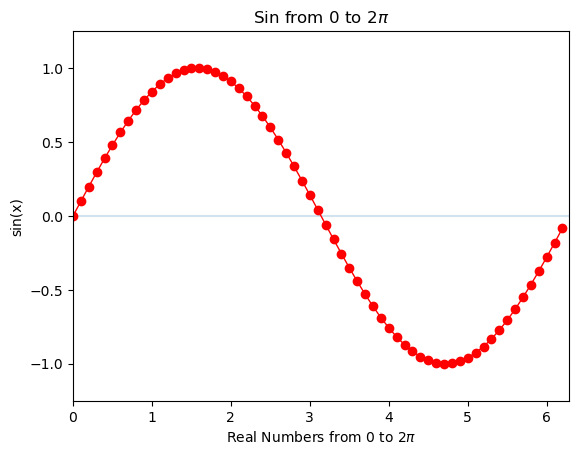

In [5]:
plt.title("Sin from 0 to 2$\pi$")
plt.xlabel("Real Numbers from 0 to 2$\pi$")
plt.ylabel("sin(x)")

plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(-1.25, 1.25)

plt.plot(x_axis, sin, marker="o", color="red", linewidth=1)
plt.show()

In [6]:
x_lim

6.283185307179586

In [7]:
# DATA SET 3
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

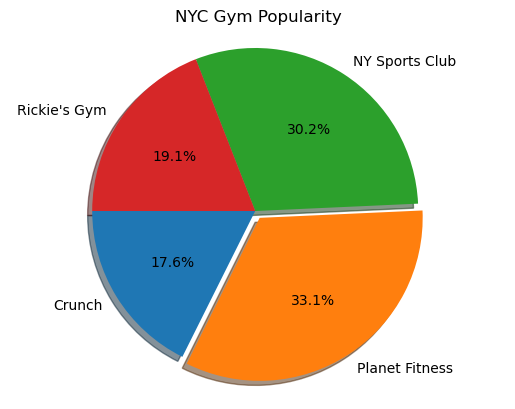

In [8]:
plt.title("NYC Gym Popularity")
plt.pie(members, explode=explode, labels=gyms, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

In [9]:
# DATA SET 4
x_axis = np.arange(0, 10, 0.1)
times = []
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))
# times

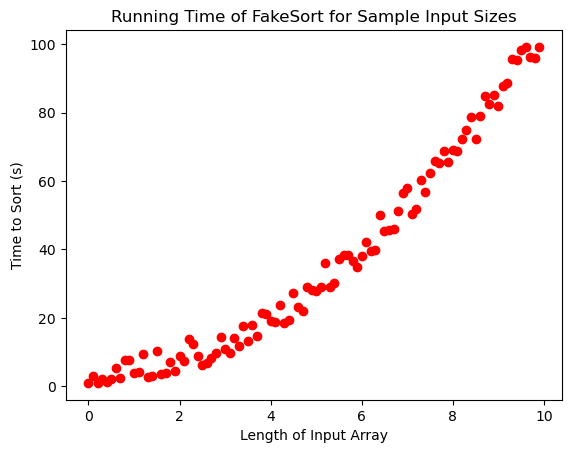

In [10]:
plt.title("Running Time of FakeSort for Sample Input Sizes")
plt.xlabel("Length of Input Array")
plt.ylabel("Time to Sort (s)")

plt.scatter(x_axis, times, marker="o", color="red")
plt.show()

# ===========================

### 2.02 Instructor Do: Plotting Pandas Data (0:10)

In [11]:
%matplotlib notebook

In [12]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Using MatplotLib to Chart a DataFrame

In [13]:
# Load in csv
rain_df = pd.read_csv("02-Ins_PandasPlot/Resources/avg_rain_state.csv")
rain_df.head()

State  Inches  Millimetres
0      Alaska    43.2         1098
1     Alabama    58.9         1495
2    Arkansas    55.9         1421
3     Arizona    12.6          321
4  California    22.2          564

In [14]:
rain_df.dtypes

State           object
Inches         float64
Millimetres      int64
dtype: object

<IPython.core.display.Javascript object>


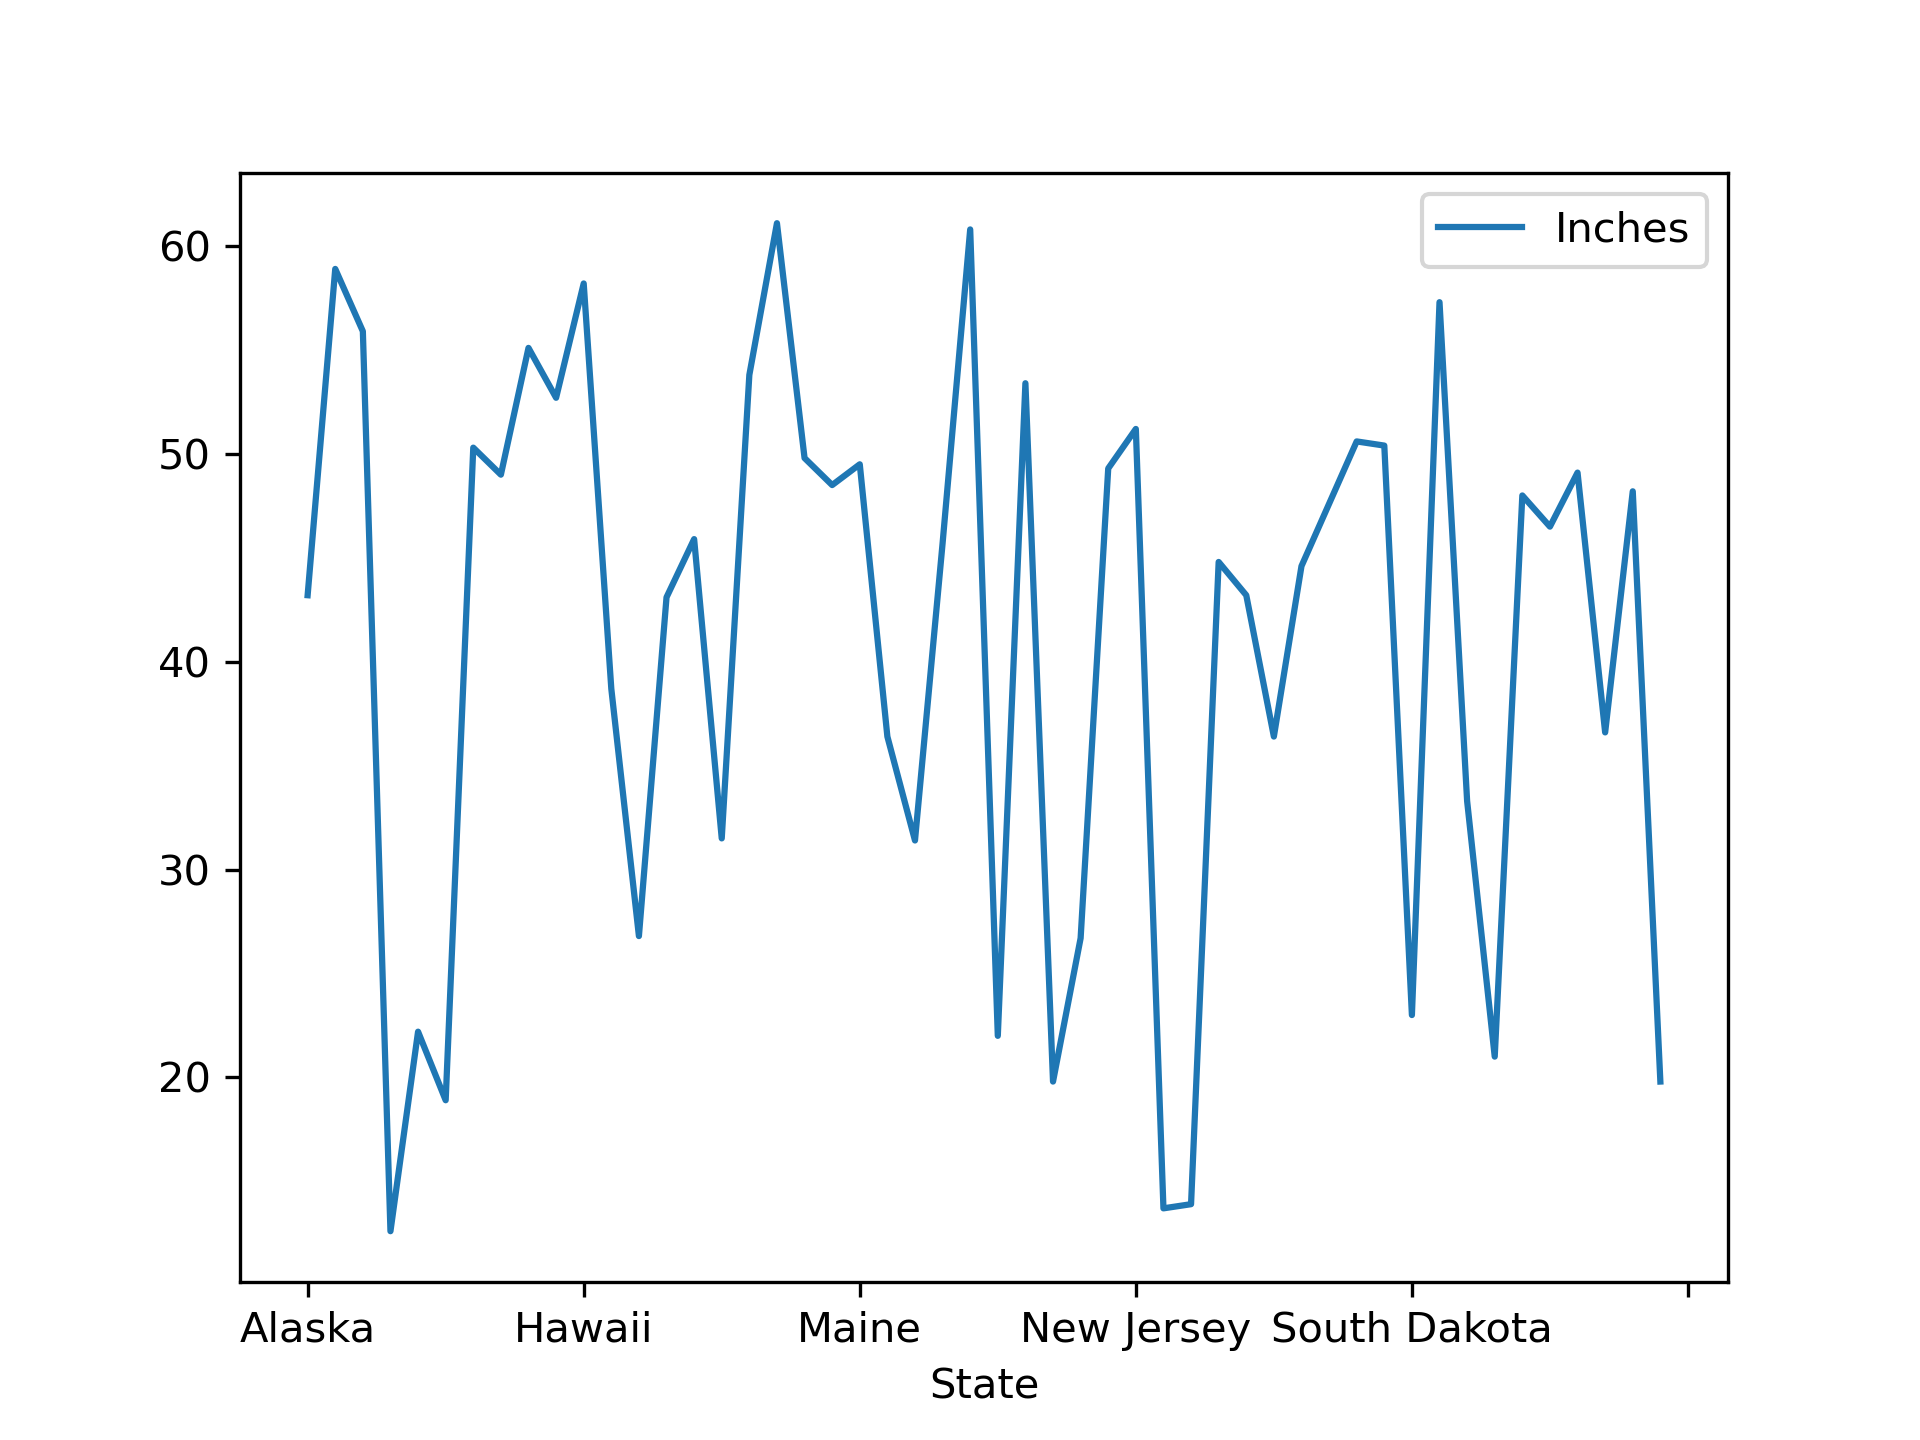

<AxesSubplot:xlabel='State'>

In [15]:
rain_df[["State", "Inches"]].set_index("State").plot()

In [16]:
# Set x axis and tick locations
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


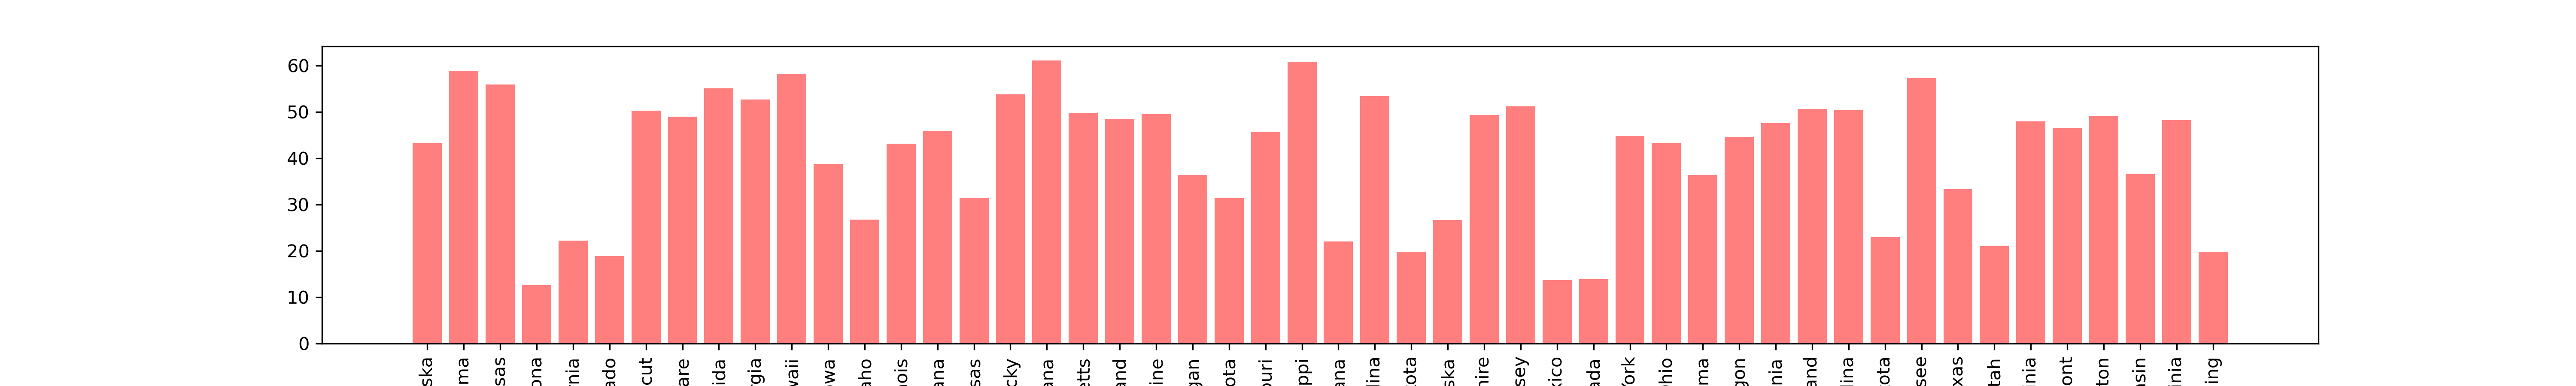

In [17]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
plt.show()

<IPython.core.display.Javascript object>


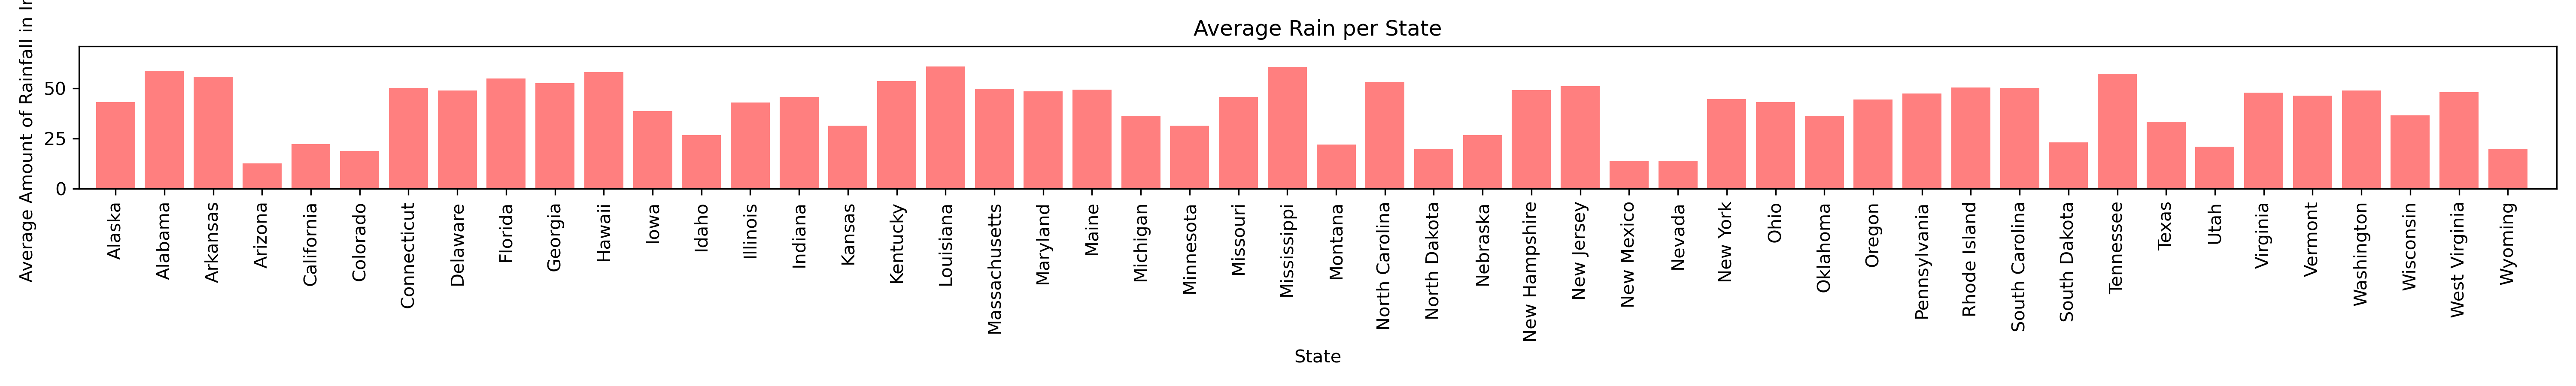

In [19]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(rain_df["State"], rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.show()

In [22]:
# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)

(0.0, 71.1)

In [23]:
# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

Text(651.1666666666667, 0.5, 'Average Amount of Rainfall in Inches')

In [24]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("avg_state_rain.png")
plt.show()

[avg_state_rain.png](avg_state_rain.png)

### Using Pandas to Chart a DataFrame

In [25]:
# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

Inches
State             
Alaska        43.2
Alabama       58.9
Arkansas      55.9
Arizona       12.6
California    22.2

<IPython.core.display.Javascript object>


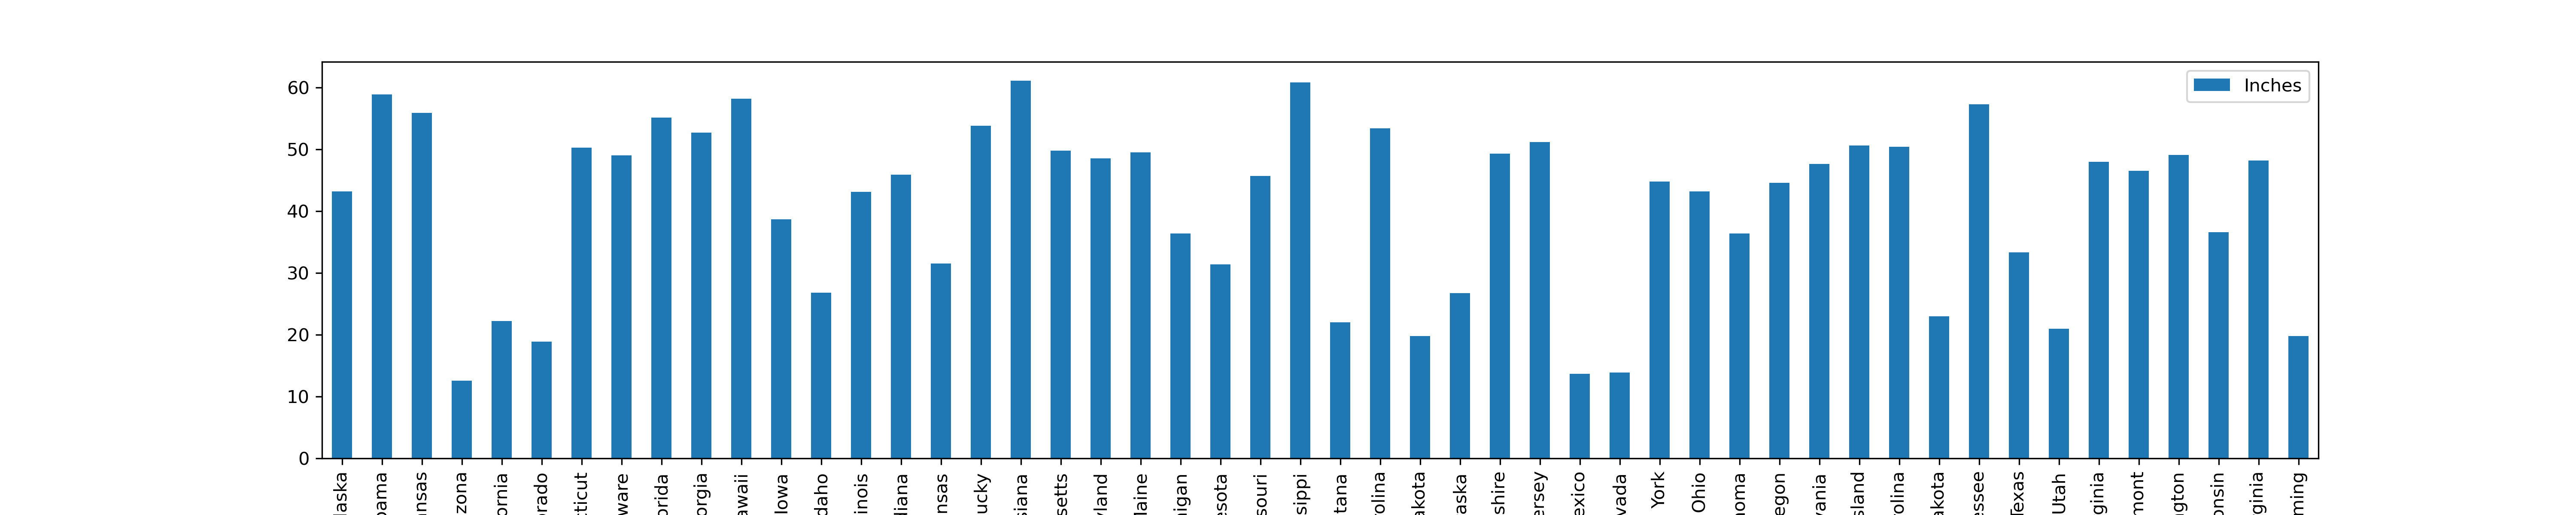

<AxesSubplot:xlabel='State'>

In [26]:
state_and_inches.plot.bar(figsize=(20, 4))

<IPython.core.display.Javascript object>


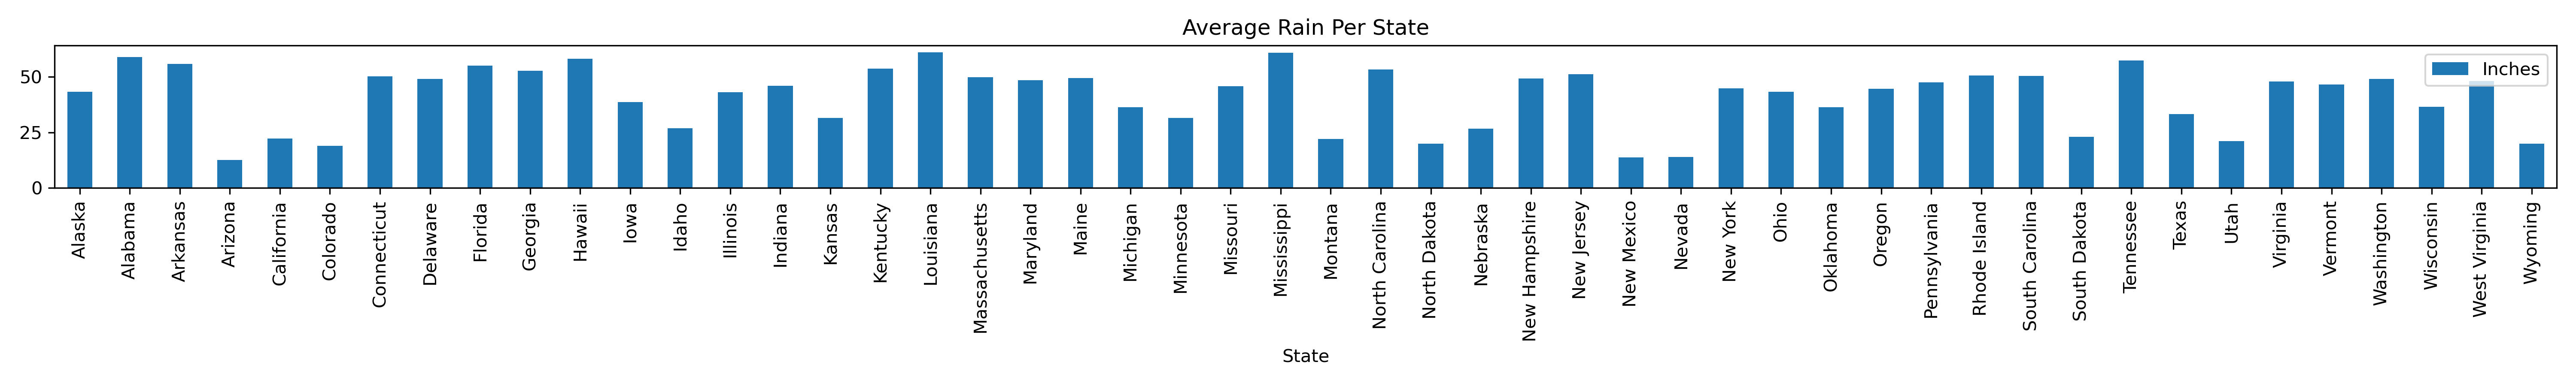

In [27]:
# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3), title="Average Rain Per State")
# state_and_inches.plot(kind="pie", y="Inches")

# Set a title for the chart
# plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


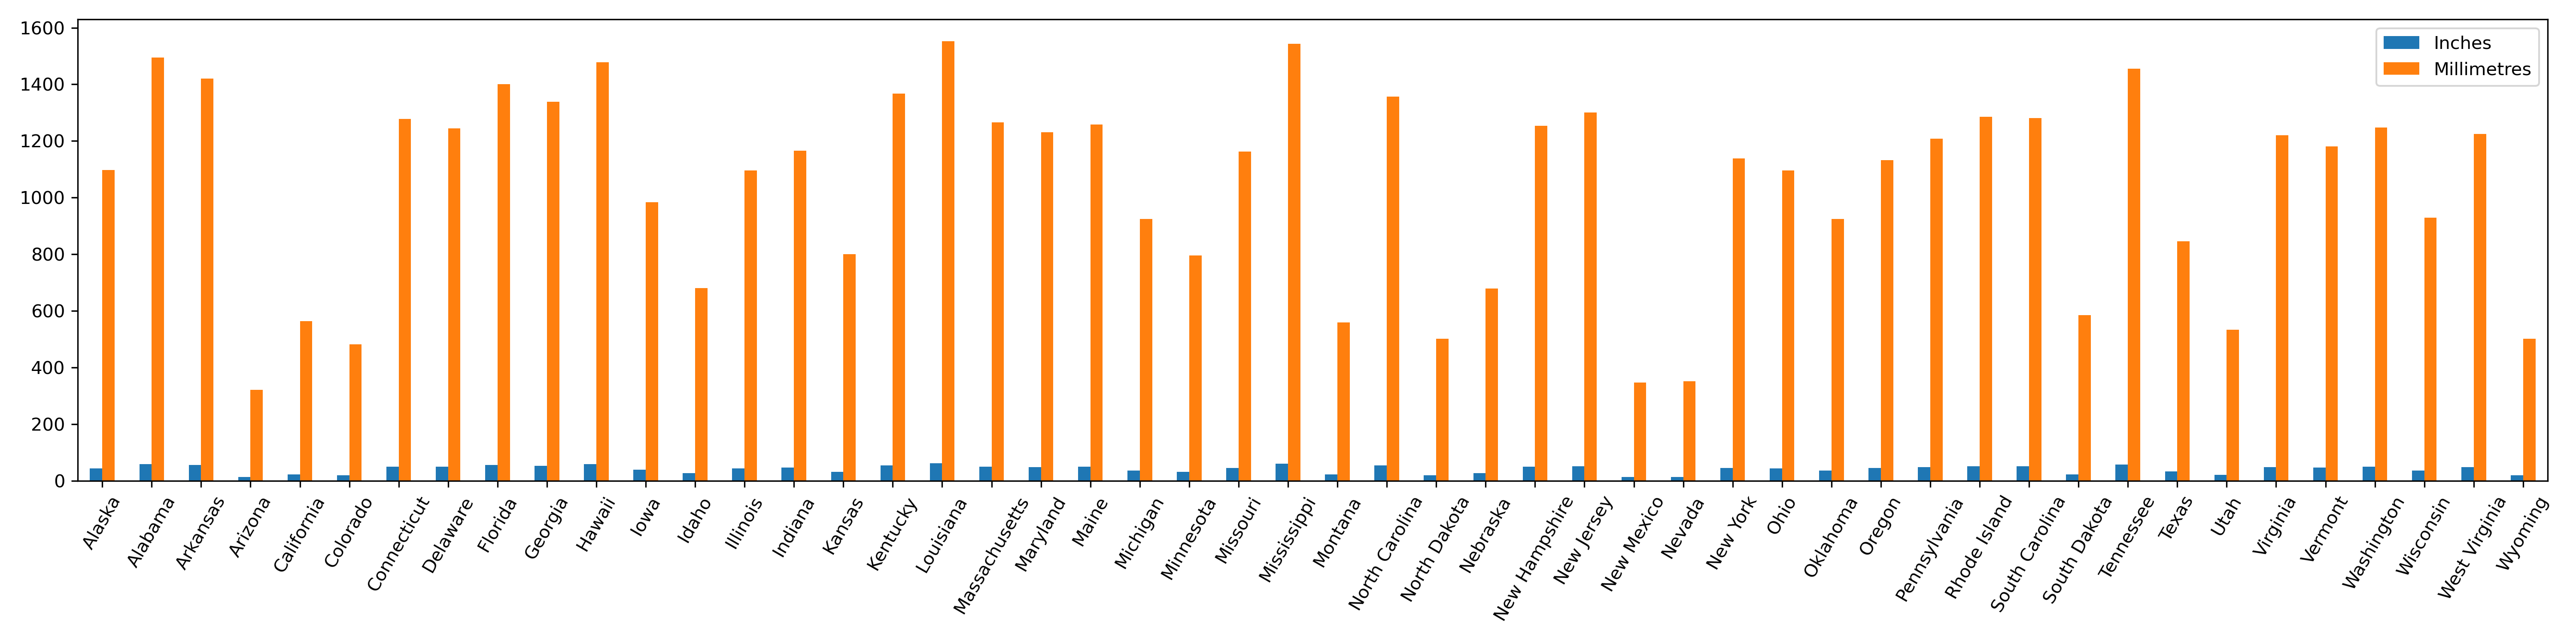

In [28]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=60)

plt.show()
plt.tight_layout()

In [ ]:
rain_df.plot(kind="hexbin", x="Rank", y="Inches")

In [30]:
plt.savefig("avg_state_rain2.png")

[avg_state_rain2.png](avg_state_rain2.png)

# ===========================

### 2.03 Student Do: Union Settlements (15 min)

# Union Settlements

In this activity, you will use a dataset of 523 partial records, reduced from 13,758 total records, about major collective bargaining settlements in 1995. The [Access to Archival Databases (AAD)](https://aad.archives.gov/aad/) limits downloads to 1,000 records, so this collection was reduced to the following unions: Actors Equity Association (AEA), Air Line Pilots (ALPA), Auto Workers (UAW), Bakery, Confectionery Workers International Union of America (BCW), Clothing and Textile Workers (ACTWU), and Elevator Constructors (IUEC).

Create a bar chart that visualizes the total number of major collective bargaining settlements by union.

## Instructions

Your task is to plot the total number of major collective bargaining settlements by union. In other words, you need to determine how many settlements were made by each union.

Use the following instructions:

* Use Pandas to load the `union_settlements_1995.csv` dataset.

* Create a Series containing the number of settlements made by each union. This is a large dataset, so you may want to list the columns to determine the name of the one you want to use.

* Using this Series, create a bar chart with red bars. Some of the labels will be longer, so adjust the figure size of the plot. Add a title and axis labels.

* Use your data to retrieve labels for your x-axis ticks, and rotate them 45 degrees.

  **Note:** If you have difficulty with displaying the x-tick labels when rotating them, check the [Matplotlib documentation](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) for arguments that you can use to make changes.

* Display your plot. Which union agreed to the most settlements? The fewest?

## Bonus

Find how many national settlements were agreed to by each union, and plot the national totals alongside all settlement totals.

## References

[The National Archives](https://aad.archives.gov/aad/display-partial-records.jsp?dt=298&sc=1520%2C1523%2C1501%2C1502%2C1537%2C1503%2C1505%2C1507&cat=PS33&tf=F&bc=%2Csl%2Cfd&q=&as_alq=&as_anq=&as_epq=&as_woq=&nfo_1520=V%2C5%2C1900&op_1520=0&txt_1520=&nfo_1523=V%2C47%2C1900&op_1523=0&txt_1523=&nfo_1501=V%2C2%2C1900&cl_1501=&nfo_1502=V%2C1%2C1900&cl_1502=&nfo_1537=V%2C2%2C1900&cl_1537=&nfo_1503=V%2C7%2C1900&cl_1503=AAAA%2CAEA%2CALPA%2CNATC%2CAPA%2CUAW%2CBCW%2CMLBPA%2CNBPA%2CACTWU%2CIUEC&nfo_1505=N%2C6%2C1900&op_1505=3&txt_1505=&txt_1505=&nfo_1507=D%2C6%2C1900&op_1507=3&txt_1507=&txt_1507=)

- - -

In [31]:
%matplotlib notebook

In [32]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
# Read CSV
settlement_data = pd.read_csv("03-Stu_Settlements-PlottingPandas/Solved/Resources/union_settlements_1995.csv")
settlement_data.head()

SCHEDULE NUMBER  NEGOTIATION NUMBER  BLANK1  \
0            17031                  51     NaN   
1            17031                  52     NaN   
2            17031                  53     NaN   
3            17031                  54     NaN   
4            17031                  55     NaN   

                  COMPANY IDENTIFYING INFORMATION   SIC Code  BLANK2  \
0  ELEVATOR MANUFACTORS ASSN    LU 1        4799-3       NaN     NaN   
1  ELEVATOR MANUFACTURING ASSN    LU 1      (4799)       NaN     NaN   
2                      ELEVATOR MANUFACTURERS ASSN      50.0     NaN   
3                         ELEVATOR MFRS ASSN  LU 1      50.0     NaN   
4                   ELEVATOR MFRS ASSN OF NYC  LU1      50.0     NaN   

                               SIC Code.1  SIC Code.2  BLANK3  \
0  Construction Special Trade Contractors          96     NaN   
1  Construction Special Trade Contractors          96     NaN   
2  Construction Special Trade Contractors          96     NaN   
3  Construction Special Trade Contractors          96     NaN   
4  Construction Special Trade Contractors          96     NaN   

  TYPE OF BARGAINING UNIT  ...  BLANK16 CPI FORMULA  BLANK17  \
0   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
1   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
2   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
3   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
4   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   

  DATE OF FIRST COST-OF-LIVING REVIEW  BLANK18  \
0                                 NaN      NaN   
1                                 NaN      NaN   
2                                 NaN      NaN   
3                                 NaN      NaN   
4                                 NaN      NaN   

  DATE OF LAST COST-OF-LIVING REVIEW  BLANK19 WORK STOPPAGE BEGINNING DATE  \
0                                NaN      NaN                          NaN   
1                                NaN      NaN                          NaN   
2                                NaN      NaN                          NaN   
3                                NaN      NaN                          NaN   
4                                NaN      NaN                          NaN   

   BLANK20  WORK STOPPAGE ENDING DATE  
0      NaN                        NaN  
1      NaN                        NaN  
2      NaN                        NaN  
3      NaN                        NaN  
4      NaN                        NaN  

[5 rows x 46 columns]

In [34]:
settlement_data.columns

Index(['SCHEDULE NUMBER', 'NEGOTIATION NUMBER', 'BLANK1',
       'COMPANY IDENTIFYING INFORMATION ', 'SIC Code', 'BLANK2', 'SIC Code.1',
       'SIC Code.2', 'BLANK3', 'TYPE OF BARGAINING UNIT', 'BLANK4',
       'REGIONAL OR STATE', 'BLANK5', 'LOCATION', 'BLANK6', 'UNION', 'BLANK7',
       'UNION CODE', 'BLANK8', 'NUMBER OF EMPLOYEES', 'BLANK9',
       'NEGOTIATION DATE', 'BLANK10', 'AGREEMENT EFFECTIVE DATE', 'BLANK11',
       'NEW EXPIRATION DATE', 'BLANK12', 'REOPENING DATE', 'BLANK13',
       'ESCALATOR OVERALL CONTROL', 'INDEX CODE', 'BLANK14',
       'TYPE OF ESCALATOR CLAUSE', 'MINIMUM AND/OR MAXIMUM CODE', 'BLANK15',
       'CPI BASE YEAR', 'BLANK16', 'CPI FORMULA', 'BLANK17',
       'DATE OF FIRST COST-OF-LIVING REVIEW', 'BLANK18',
       'DATE OF LAST COST-OF-LIVING REVIEW', 'BLANK19',
       'WORK STOPPAGE BEGINNING DATE', 'BLANK20', 'WORK STOPPAGE ENDING DATE'],
      dtype='object')

In [35]:
# Get total settlements by union
union_data = settlement_data["UNION"].value_counts()

In [36]:
# Filter data to national settlements
national_settlements = settlement_data.loc[settlement_data["LOCATION"]=="NATIONAL",:]
national_settlements

SCHEDULE NUMBER  NEGOTIATION NUMBER  BLANK1  \
11             79006                  54     NaN   
12             79006                  55     NaN   
13             79006                  56     NaN   
14             79006                  57     NaN   
15             79006                  58     NaN   
..               ...                 ...     ...   
490            37158                  54     NaN   
491            37158                  55     NaN   
492            37158                  56     NaN   
493            37158                  58     NaN   
499            37168                  51     NaN   

                   COMPANY IDENTIFYING INFORMATION   SIC Code  BLANK2  \
11   LEAGUE OF NEW YORK THEATRES & PRODUCERS K 7924      50.0     NaN   
12    LEAGUE OF NY THEATRES & PRODUCERS       K7924      50.0     NaN   
13       LEAGUE OF NY THEATRES & PRODUCERS    K7924      50.0     NaN   
14       LEAGUE OF NY THEATRES & PRODUCERS   K 7924      50.0     NaN   
15                LEAGUE OF NY THEATRES & PRODUCERS      50.0     NaN   
..                                              ...       ...     ...   
490       MARTIN MARIETTA AEROSPACE DIVMM CORP  K10      50.0     NaN   
491              MARTIN MARIETTA AEROSPACE DIV  K10      50.0     NaN   
492      MARTIN MARIETTA AEROSPACE K10 313-926-5277      50.0     NaN   
493            MARTIN MARIETTA AEROSPACE DIV    K10      50.0     NaN   
499                      ALLIEDSIGNAL WHEEL & BRAKE      50.0     NaN   

                            SIC Code.1  SIC Code.2  BLANK3  \
11   Amusement And Recreation Services          22     NaN   
12   Amusement And Recreation Services          22     NaN   
13   Amusement And Recreation Services          22     NaN   
14   Amusement And Recreation Services          22     NaN   
15   Amusement And Recreation Services          22     NaN   
..                                 ...         ...     ...   
490           Transportation Equipment          61     NaN   
491           Transportation Equipment          61     NaN   
492           Transportation Equipment          61     NaN   
493           Transportation Equipment          61     NaN   
499           Transportation Equipment          11     NaN   

       TYPE OF BARGAINING UNIT  ...  BLANK16  \
11       MORE THAN ONE COMPANY  ...      NaN   
12       MORE THAN ONE COMPANY  ...      NaN   
13       MORE THAN ONE COMPANY  ...      NaN   
14       MORE THAN ONE COMPANY  ...      NaN   
15       MORE THAN ONE COMPANY  ...      NaN   
..                         ...  ...      ...   
490    MULTIPLANT, ONE COMPANY  ...      NaN   
491    MULTIPLANT, ONE COMPANY  ...      NaN   
492    MULTIPLANT, ONE COMPANY  ...      NaN   
493    MULTIPLANT, ONE COMPANY  ...      NaN   
499  SINGLE PLANT, ONE COMPANY  ...      NaN   

                             CPI FORMULA  BLANK17  \
11                AT&T OR OTHER FORMULAS      NaN   
12                AT&T OR OTHER FORMULAS      NaN   
13   1 PERCENT FOR EACH 1 PERCENT CHANGE      NaN   
14                                   NaN      NaN   
15                                   NaN      NaN   
..                                   ...      ...   
490       1 CENT FOR EACH 0.3 PT. CHANGE      NaN   
491       1 CENT FOR EACH 0.4 PT. CHANGE      NaN   
492       1 CENT FOR EACH 0.4 PT. CHANGE      NaN   
493                                  NaN      NaN   
499               AT&T OR OTHER FORMULAS      NaN   

    DATE OF FIRST COST-OF-LIVING REVIEW  BLANK18  \
11                              6/29/82      NaN   
12                              6/25/84      NaN   
13                              6/30/87      NaN   
14                                  NaN      NaN   
15                                  NaN      NaN   
..                                  ...      ...   
490                             2/14/82      NaN   
491                             2/14/85      NaN   
492                              2/8/88      NaN   
493                     

In [37]:
# Get national settlements by union
national_union_data = national_settlements["UNION"].value_counts()

In [38]:
# Create new dataframe for data to chart
compare_all_national_df = pd.DataFrame({"National Settlements": national_union_data,
                                       "All Settlements": union_data})
compare_all_national_df

National Settlements  \
ACTORS EQUITY ASSOCIATION                                            5.0   
AIR LINE PILOTS                                                     49.0   
AUTO WORKERS                                                       140.0   
BAKERY, CONFECTIONERY WORKERS INTERNATIONAL UNI...                   7.0   
CLOTHING AND TEXTILE WORKERS                                        15.0   
ELEVATOR CONSTRUCTORS                                                NaN   

                                                    All Settlements  
ACTORS EQUITY ASSOCIATION                                         8  
AIR LINE PILOTS                                                  49  
AUTO WORKERS                                                    322  
BAKERY, CONFECTIONERY WORKERS INTERNATIONAL UNI...               19  
CLOTHING AND TEXTILE WORKERS                                    120  
ELEVATOR CONSTRUCTORS                                             8

In [39]:
# Fill NA
compare_all_national_df = compare_all_national_df.fillna(0)
compare_all_national_df

National Settlements  \
ACTORS EQUITY ASSOCIATION                                            5.0   
AIR LINE PILOTS                                                     49.0   
AUTO WORKERS                                                       140.0   
BAKERY, CONFECTIONERY WORKERS INTERNATIONAL UNI...                   7.0   
CLOTHING AND TEXTILE WORKERS                                        15.0   
ELEVATOR CONSTRUCTORS                                                0.0   

                                                    All Settlements  
ACTORS EQUITY ASSOCIATION                                         8  
AIR LINE PILOTS                                                  49  
AUTO WORKERS                                                    322  
BAKERY, CONFECTIONERY WORKERS INTERNATIONAL UNI...               19  
CLOTHING AND TEXTILE WORKERS                                    120  
ELEVATOR CONSTRUCTORS                                             8

<IPython.core.display.Javascript object>


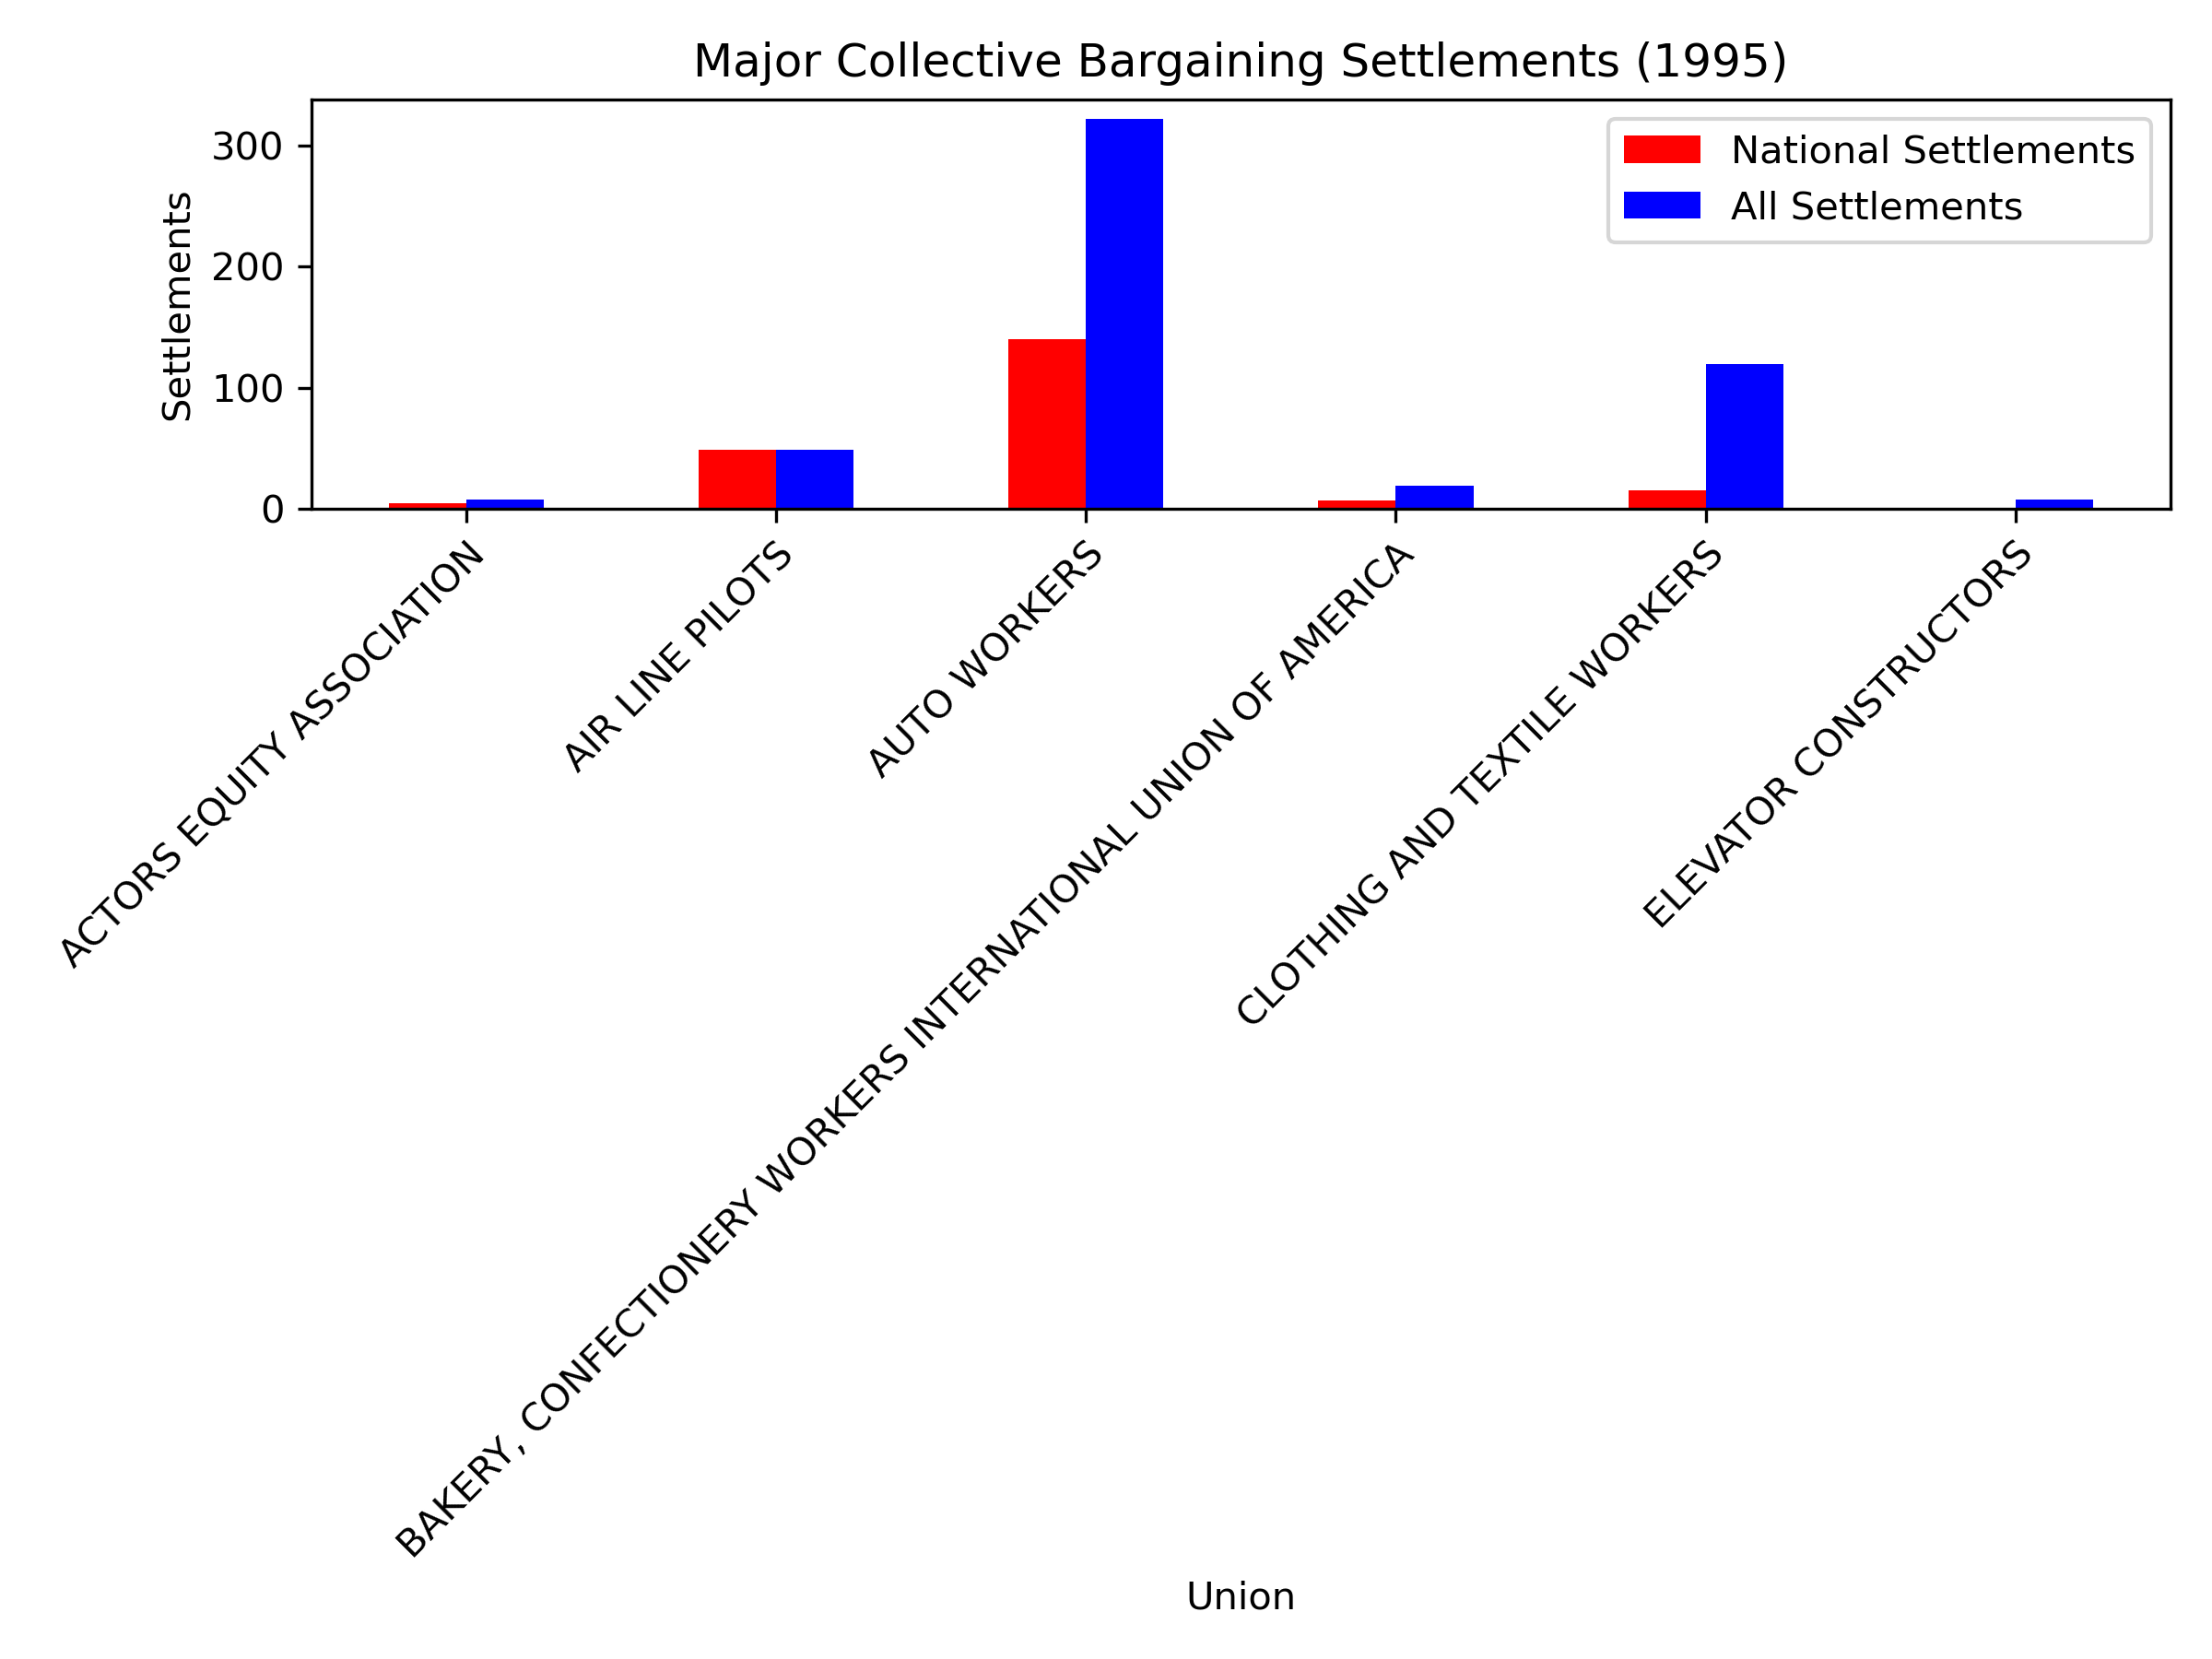

In [40]:
# Configure plot, figsize, title, and axis labels
figure1 = compare_all_national_df.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Major Collective Bargaining Settlements (1995)",
                                   xlabel="Union",
                                   ylabel="Settlements")

# Configure x-tick rotation
xticklabels = compare_all_national_df.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [41]:
# Resize plot to display labels
plt.tight_layout()

In [42]:
%matplotlib notebook

In [43]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
# Read CSV
settlement_data = pd.read_csv("03-Stu_Settlements-PlottingPandas/Solved/Resources/union_settlements_1995.csv")
settlement_data.head()

SCHEDULE NUMBER  NEGOTIATION NUMBER  BLANK1  \
0            17031                  51     NaN   
1            17031                  52     NaN   
2            17031                  53     NaN   
3            17031                  54     NaN   
4            17031                  55     NaN   

                  COMPANY IDENTIFYING INFORMATION   SIC Code  BLANK2  \
0  ELEVATOR MANUFACTORS ASSN    LU 1        4799-3       NaN     NaN   
1  ELEVATOR MANUFACTURING ASSN    LU 1      (4799)       NaN     NaN   
2                      ELEVATOR MANUFACTURERS ASSN      50.0     NaN   
3                         ELEVATOR MFRS ASSN  LU 1      50.0     NaN   
4                   ELEVATOR MFRS ASSN OF NYC  LU1      50.0     NaN   

                               SIC Code.1  SIC Code.2  BLANK3  \
0  Construction Special Trade Contractors          96     NaN   
1  Construction Special Trade Contractors          96     NaN   
2  Construction Special Trade Contractors          96     NaN   
3  Construction Special Trade Contractors          96     NaN   
4  Construction Special Trade Contractors          96     NaN   

  TYPE OF BARGAINING UNIT  ...  BLANK16 CPI FORMULA  BLANK17  \
0   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
1   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
2   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
3   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   
4   MORE THAN ONE COMPANY  ...      NaN         NaN      NaN   

  DATE OF FIRST COST-OF-LIVING REVIEW  BLANK18  \
0                                 NaN      NaN   
1                                 NaN      NaN   
2                                 NaN      NaN   
3                                 NaN      NaN   
4                                 NaN      NaN   

  DATE OF LAST COST-OF-LIVING REVIEW  BLANK19 WORK STOPPAGE BEGINNING DATE  \
0                                NaN      NaN                          NaN   
1                                NaN      NaN                          NaN   
2                                NaN      NaN                          NaN   
3                                NaN      NaN                          NaN   
4                                NaN      NaN                          NaN   

   BLANK20  WORK STOPPAGE ENDING DATE  
0      NaN                        NaN  
1      NaN                        NaN  
2      NaN                        NaN  
3      NaN                        NaN  
4      NaN                        NaN  

[5 rows x 46 columns]

In [45]:
# List columns
settlement_data.columns

Index(['SCHEDULE NUMBER', 'NEGOTIATION NUMBER', 'BLANK1',
       'COMPANY IDENTIFYING INFORMATION ', 'SIC Code', 'BLANK2', 'SIC Code.1',
       'SIC Code.2', 'BLANK3', 'TYPE OF BARGAINING UNIT', 'BLANK4',
       'REGIONAL OR STATE', 'BLANK5', 'LOCATION', 'BLANK6', 'UNION', 'BLANK7',
       'UNION CODE', 'BLANK8', 'NUMBER OF EMPLOYEES', 'BLANK9',
       'NEGOTIATION DATE', 'BLANK10', 'AGREEMENT EFFECTIVE DATE', 'BLANK11',
       'NEW EXPIRATION DATE', 'BLANK12', 'REOPENING DATE', 'BLANK13',
       'ESCALATOR OVERALL CONTROL', 'INDEX CODE', 'BLANK14',
       'TYPE OF ESCALATOR CLAUSE', 'MINIMUM AND/OR MAXIMUM CODE', 'BLANK15',
       'CPI BASE YEAR', 'BLANK16', 'CPI FORMULA', 'BLANK17',
       'DATE OF FIRST COST-OF-LIVING REVIEW', 'BLANK18',
       'DATE OF LAST COST-OF-LIVING REVIEW', 'BLANK19',
       'WORK STOPPAGE BEGINNING DATE', 'BLANK20', 'WORK STOPPAGE ENDING DATE'],
      dtype='object')

In [46]:
# Get total settlements by union
union_data = settlement_data["UNION"].value_counts()

<IPython.core.display.Javascript object>


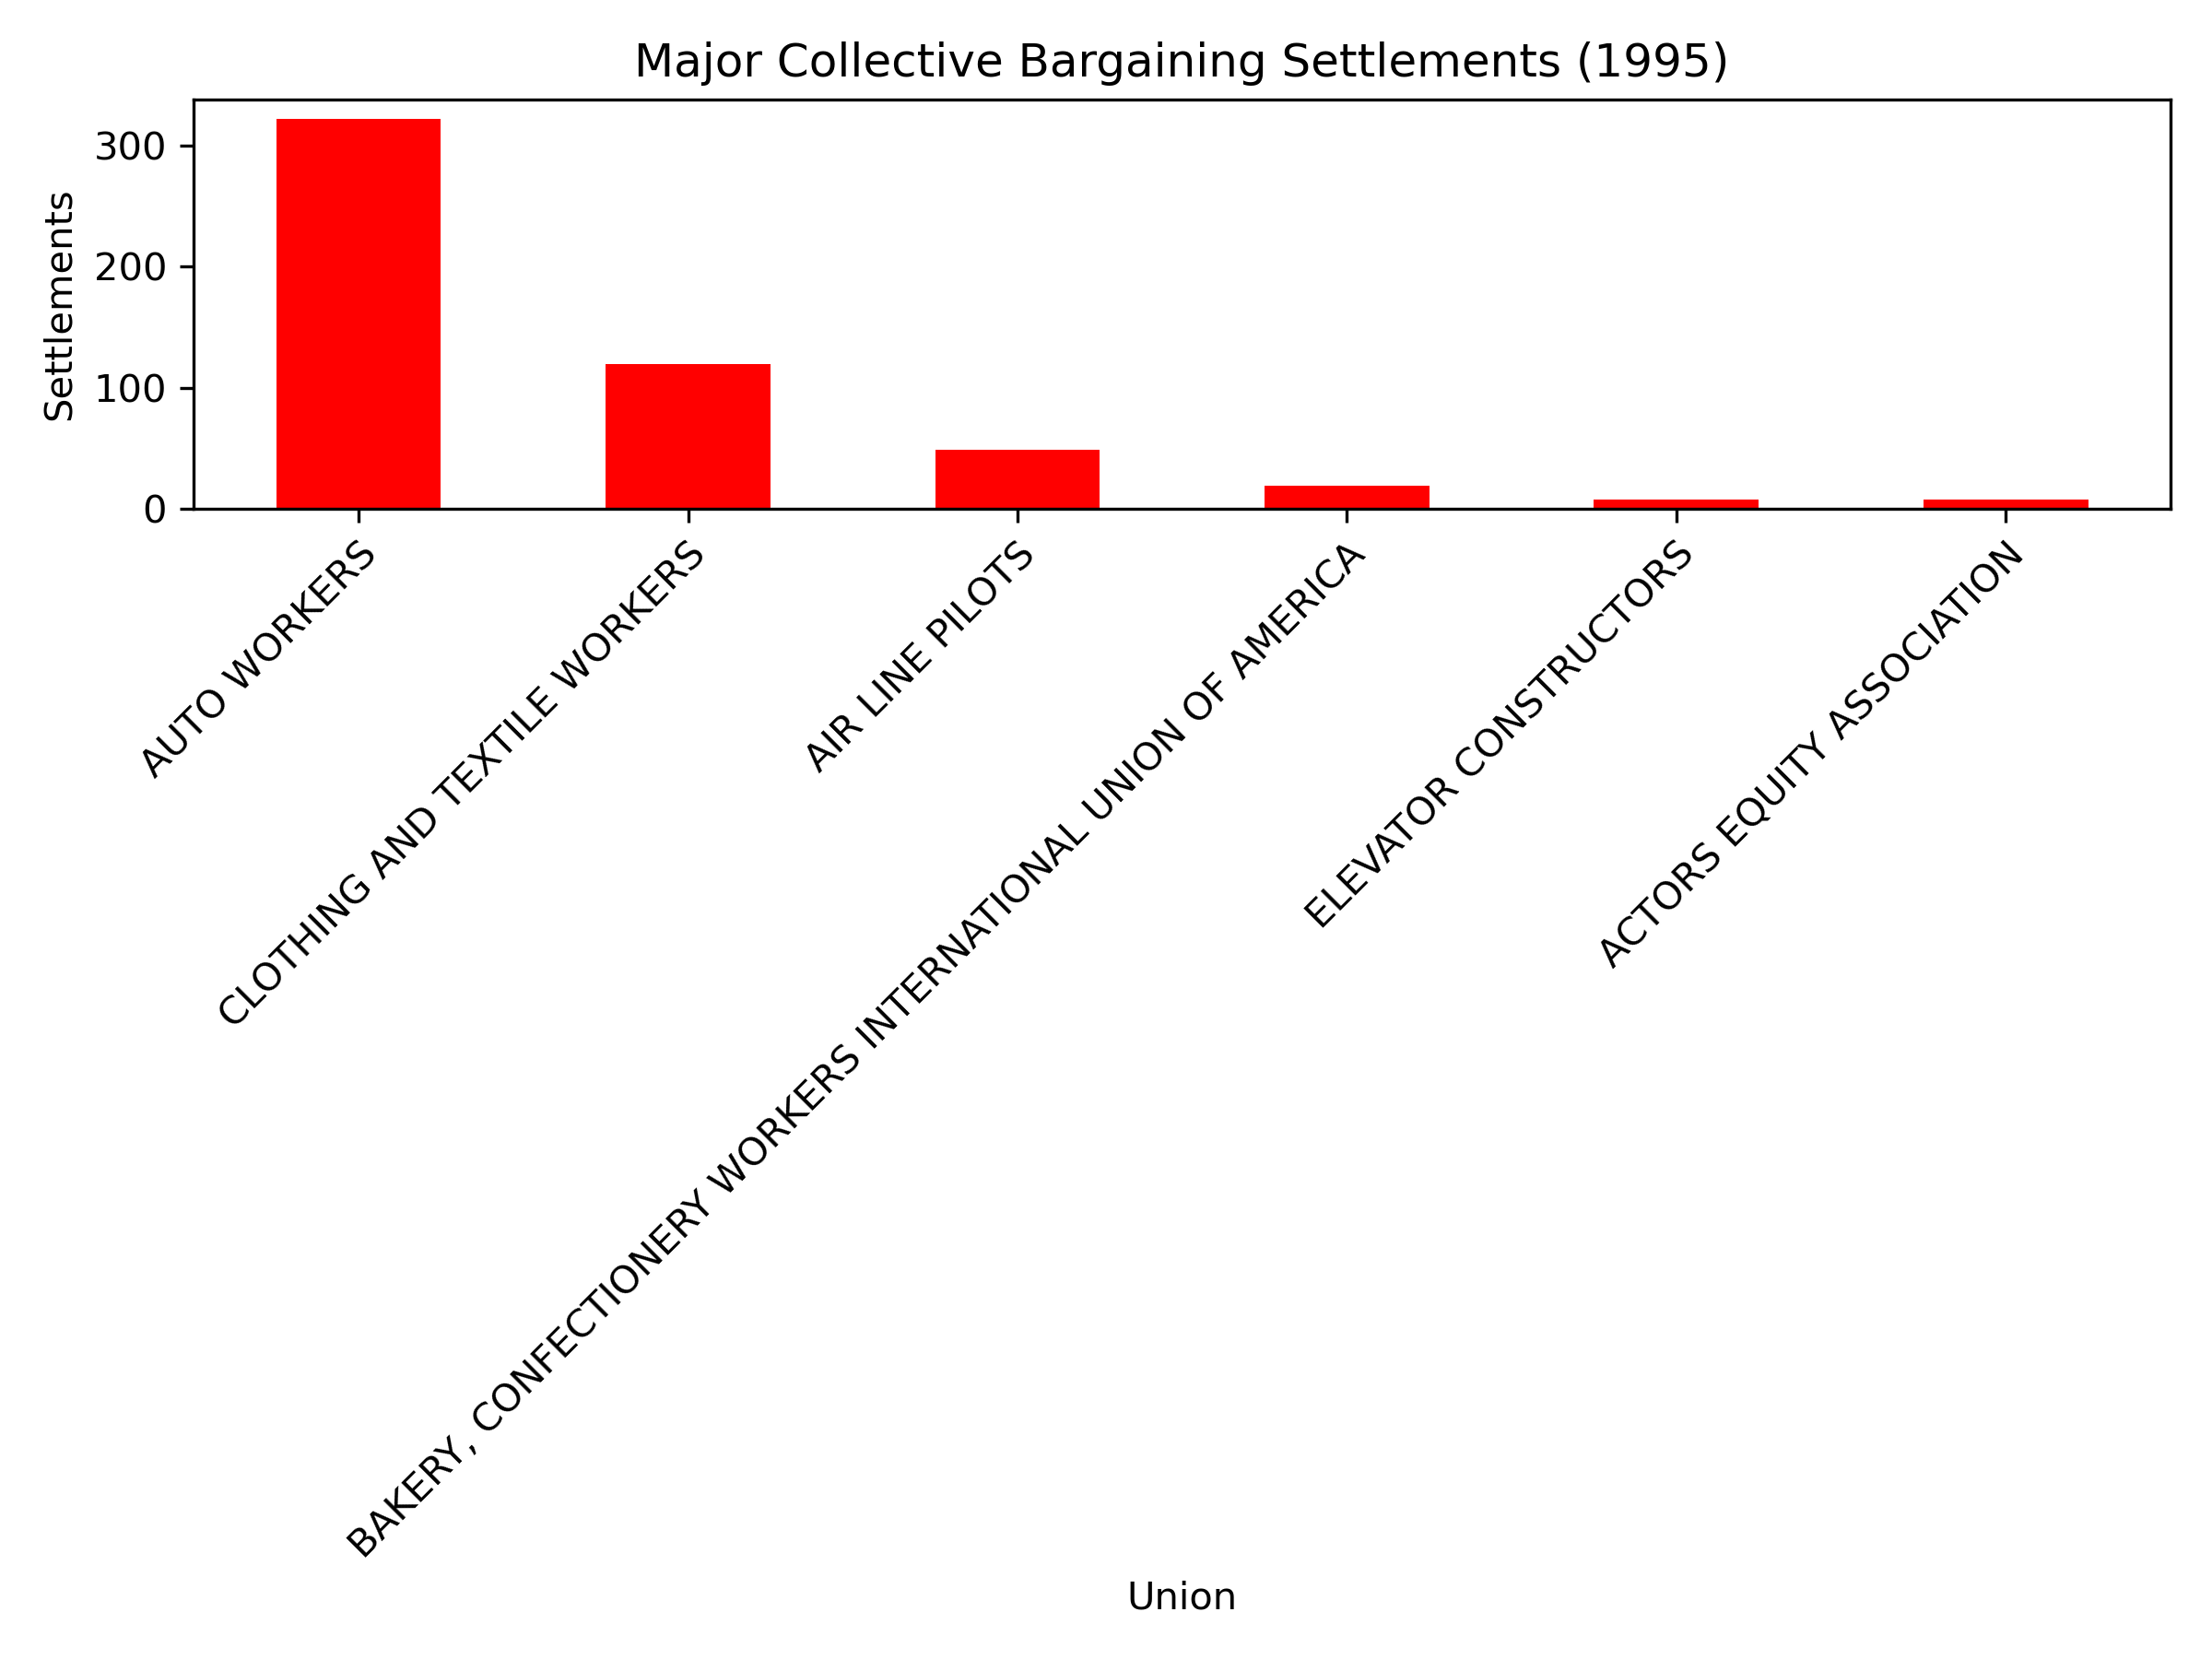

In [47]:
# Configure plot, figsize, title, and axis labels
figure1 = union_data.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Major Collective Bargaining Settlements (1995)",
                                xlabel="Union",
                                ylabel="Settlements")

# Configure x-tick rotation
xticklabels = union_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [85]:
# Resize plot to display labels
plt.tight_layout()

# ===========================

### 2.04 Instructor Do: Plotting Groups (0:05)

National Highway Traffic Safety Administration. 2019 National Accidents - Fatality Analysis Reporting System  [https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2019/National/](https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2019/National/)

- - -

In [86]:
%matplotlib notebook

In [87]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# Import our data into pandas from CSV
accident_string = '04-Ins_GroupPlots/Resources/accidents.csv'
accidents_df = pd.read_csv(accident_string, low_memory=False)

accidents_df.head()

STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0      1   Alabama    10001         2         2         0     0        3   
1      1   Alabama    10002         2         2         0     0        2   
2      1   Alabama    10003         3         3         0     0        4   
3      1   Alabama    10004         1         1         0     1        1   
4      1   Alabama    10005         1         1         0     0        1   

   PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME  CF1  \
0        3           0  ...       27                                 27    0   
1        2           0  ...       99  Unknown EMS Hospital Arrival Time    0   
2        4           0  ...        5                                  5   14   
3        1           1  ...       88   Not Applicable (Not Transported)    0   
4        1           0  ...       88   Not Applicable (Not Transported)    0   

                                             CF1NAME  CF2  CF2NAME  CF3  \
0                                               None    0     None    0   
1                                               None    0     None    0   
2  Motor Vehicle struck by falling cargo,or somet...    0     None    0   
3                                               None    0     None    0   
4                                               None    0     None    0   

  CF3NAME  FATALS  DRUNK_DR  
0    None       1         1  
1    None       1         0  
2    None       1         0  
3    None       1         0  
4    None       1         1  

[5 rows x 91 columns]

In [95]:
# Create a group based on the values in the 'FUNC_SYSNAME' column
# 'FUNC_SYSNAME' stores the type of road the accident occurred
accident_road_type = accidents_df.groupby('FUNC_SYSNAME')
# accident_road_type.count()

In [96]:
# Count how many times each road type appears in our group
count_road_types = accident_road_type['FUNC_SYSNAME'].count()

count_road_types

FUNC_SYSNAME
Interstate                                             4168
Local                                                  4151
Major Collector                                        4860
Minor Arterial                                         7284
Minor Collector                                        1236
Not Reported                                             36
Principal Arterial - Other                             9987
Principal Arterial - Other Freeways and Expressways    1358
Trafficway Not in State Inventory                        85
Unknown                                                  79
Name: FUNC_SYSNAME, dtype: int64

<IPython.core.display.Javascript object>


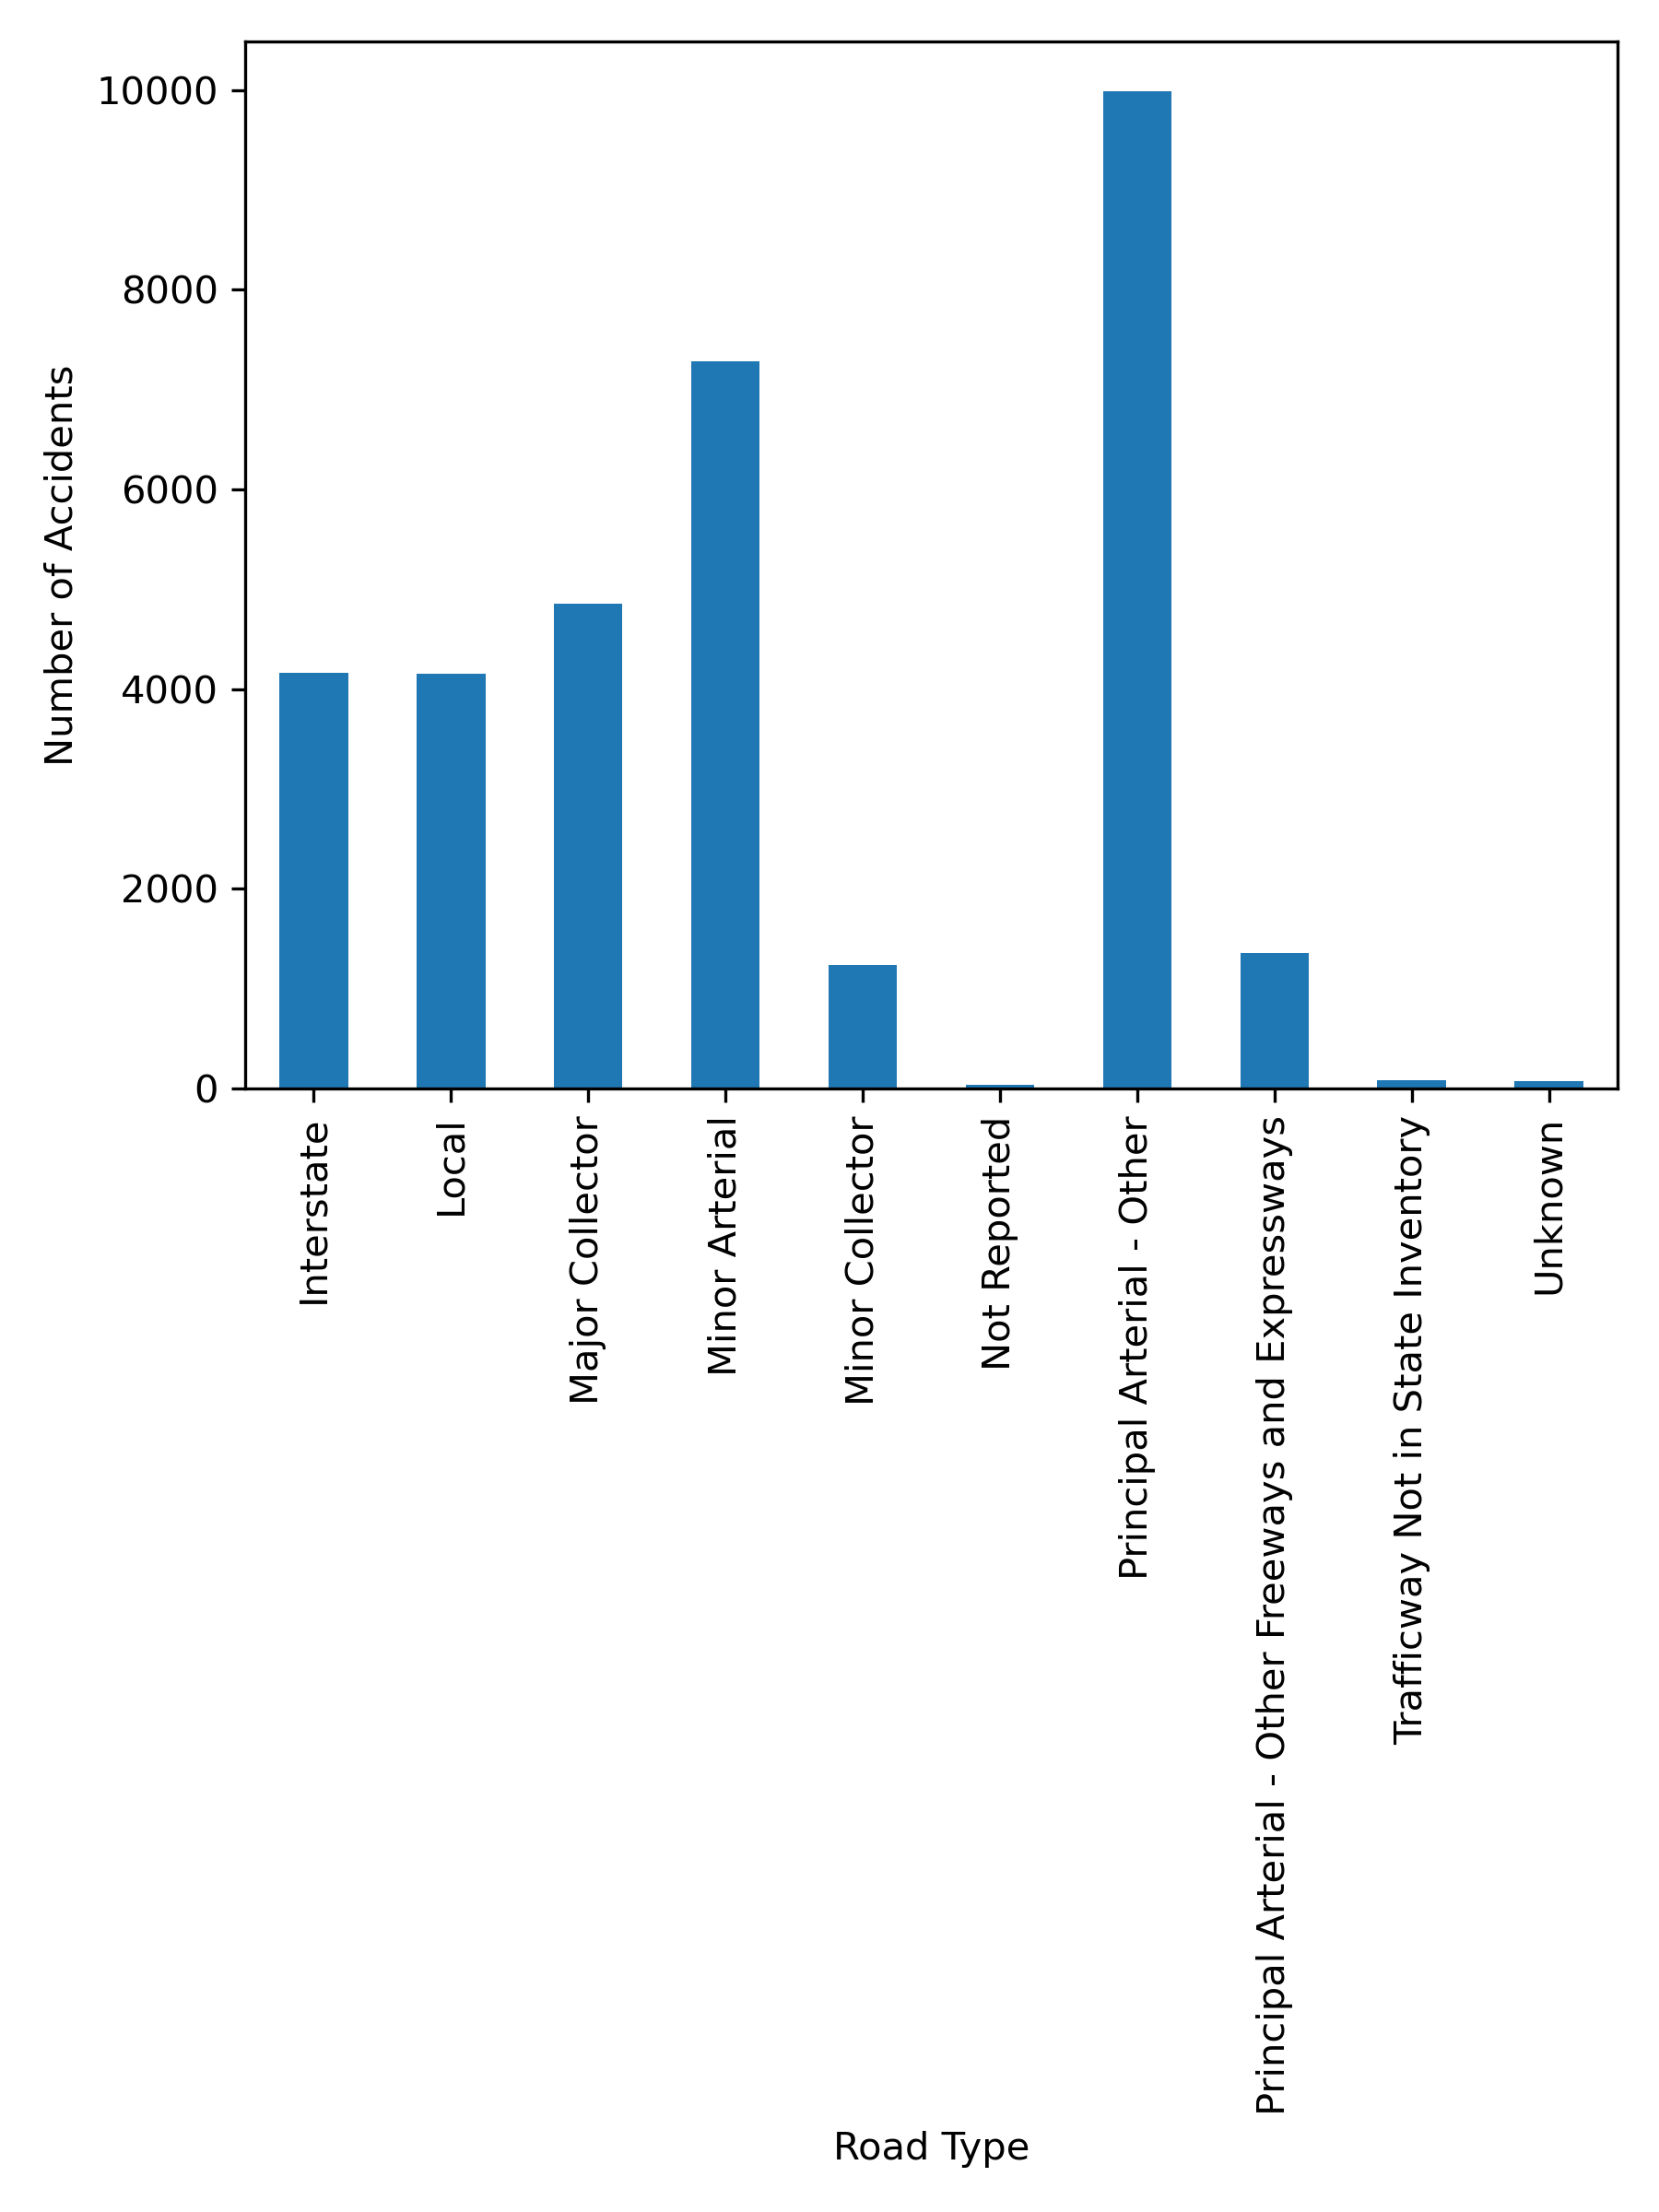

In [98]:
# Create a bar chart based off of the group series from before
count_chart = count_road_types.plot(kind='bar', figsize=(6,8), xlabel="Road Type")

# Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Road Type")
count_chart.set_ylabel("Number of Accidents")

plt.show()
plt.tight_layout()

# ===========================

### 2.05 Student Do: Library Usage: Grouped Charts (15 min)

# Library Usage

In this activity, you will create a pair of charts based on library usage collected from San Francisco. This dataset includes information on library patrons who became patrons of San Francisco Public Library between 2003 and 2016, and tracks their total library usage during that period.

## Instructions

* Open the [starter file](Unsolved/library_usage.ipynb) and follow the prompts to import, split, and summarize the library dataset.

* Create a bar chart by using Pandas and Matplotlib that visualizes how many patrons checked out items by patron type.

* Create a pie graph by using Pandas and Matplotlib that can be used to visualize the total checkouts by patron type of a single home branch location (or `Home Library Definition`).

  * **Note:** Since there are quite a lot of patron types with minimal checkouts, the pie charts could look messy with overlapping text. You may like to include a filter to limit the minimum number of total checkouts by patron group.


## References

[City and County of San Francisco. (2019). Library Usage. San Francisco Open Data.](https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup)

- - -

In [106]:
%matplotlib notebook

# Library Usage

For this assignment, you will be taking Library Usage data from San Francisco and creating charts to determine which patron type checks out items from the library the most.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Reduce the data to include only patrons who have checked out at least one item
* Split up your data into groups based upon the 'Patron Type Definition' column
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [107]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [108]:
# Import our data into pandas from CSV
string_thing = '05-Stu_LibraryUsage-Groupby/Resources/library_usage.csv'
library_usage_df = pd.read_csv(string_thing, low_memory=False)

library_usage_df.head()

Patron Type Code Patron Type Definition  Total Checkouts  Total Renewals  \
0                 0                  ADULT                0               0   
1                 0                  ADULT               31              22   
2                 0                  ADULT                0               0   
3                 0                  ADULT                0               0   
4                 0                  ADULT              126              11   

        Age Range Home Library Code Home Library Definition  \
0  20 to 24 years                P1                    Park   
1  25 to 34 years                S7                  Sunset   
2  45 to 54 years                P1                    Park   
3  25 to 34 years                 X            Main Library   
4  45 to 54 years                M2                  Marina   

  Circulation Active Month Circulation Active Year Notice Preference Code  \
0                     None                    None                      z   
1                    April                    2016                      z   
2                     None                    None                      a   
3                     None                    None                      z   
4                  January                    2016                      z   

  Notice Preference Definition  Provided Email Address  \
0                        email                    True   
1                        email                    True   
2                        print                   False   
3                        email                    True   
4                        email                    True   

   Year Patron Registered  Outside of County  Supervisor District  
0                    2014              False                  5.0  
1                    2010              False                  4.0  
2                    2016               True                  NaN  
3                    2015              False                  3.0  
4                    2003              False                  2.0

<IPython.core.display.Javascript object>


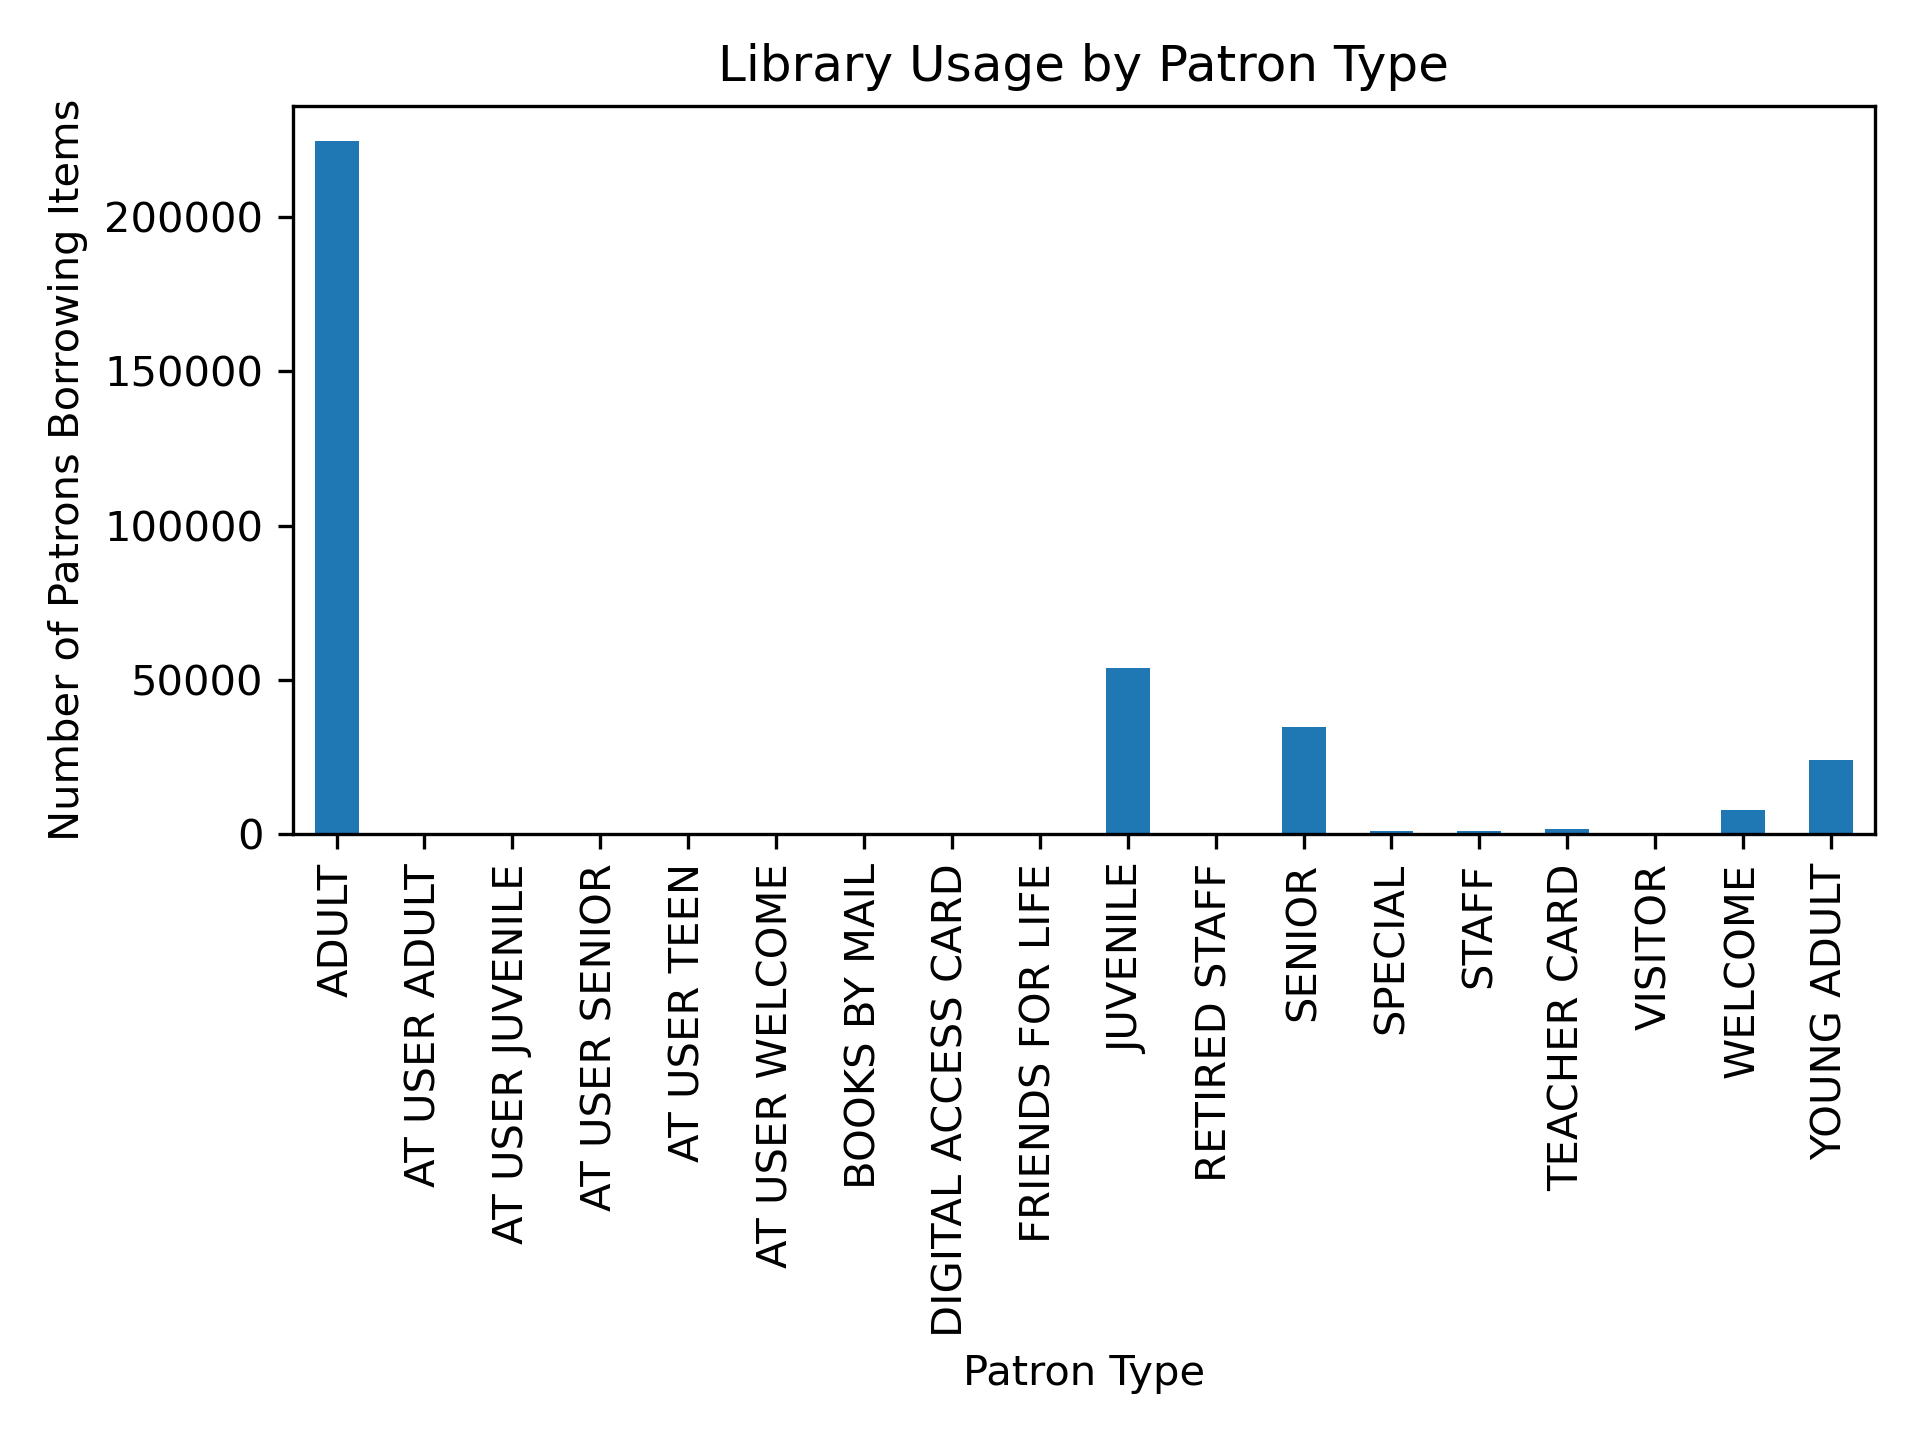

In [109]:
# Filter data so it only includes patrons who checked out at least one item
library_loans_df = pd.DataFrame(library_usage_df.loc[library_usage_df['Total Checkouts']>0])

# Split up our data into groups based upon 'Patron Type Definition'
patron_groups = library_loans_df.groupby('Patron Type Definition')

# Find out how many of each patron type borrowed library items
patron_borrows = patron_groups['Total Checkouts'].count()

# Chart our data, give it a title, and label the axes
patron_chart = patron_borrows.plot(kind="bar", title="Library Usage by Patron Type")
patron_chart.set_xlabel("Patron Type")
patron_chart.set_ylabel("Number of Patrons Borrowing Items")

plt.show()
plt.tight_layout()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each library branch. For this part of the activity, we want you to chart the total 'Total Checkouts' of each library, sorted by patron type. If you are able to, try and come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

Since there are quite a lot of patron types with minimal checkouts, the pie charts could look messy with overlapping text. You may also like to include a filter to limit the minimum number of total checkouts by patron group.

In [110]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'
library_groups = library_usage_df.groupby(['Home Library Definition','Patron Type Definition'])

# Create a new variable that holds the sum of our groups
sum_it_up = library_groups[['Total Checkouts']].sum()
sum_it_up.head(20)

Total Checkouts
Home Library Definition     Patron Type Definition                 
Anza                        ADULT                            855994
                            AT USER ADULT                       131
                            AT USER JUVENILE                     77
                            AT USER TEEN                         45
                            DIGITAL ACCESS CARD                   4
                            FRIENDS FOR LIFE                   1456
                            JUVENILE                         289395
                            RETIRED STAFF                       543
                            SENIOR                           328922
                            STAFF                              9545
                            TEACHER CARD                       4192
                            VISITOR                              17
                            WELCOME                             445
                            YOUNG ADULT                      222294
Bayview/Linda Brooks-Burton ADULT                            269157
                            AT USER ADULT                       217
                            AT USER SENIOR                       42
                            AT USER TEEN                          0
                            AT USER WELCOME                       0
                            DIGITAL ACCESS CARD                  14

<IPython.core.display.Javascript object>


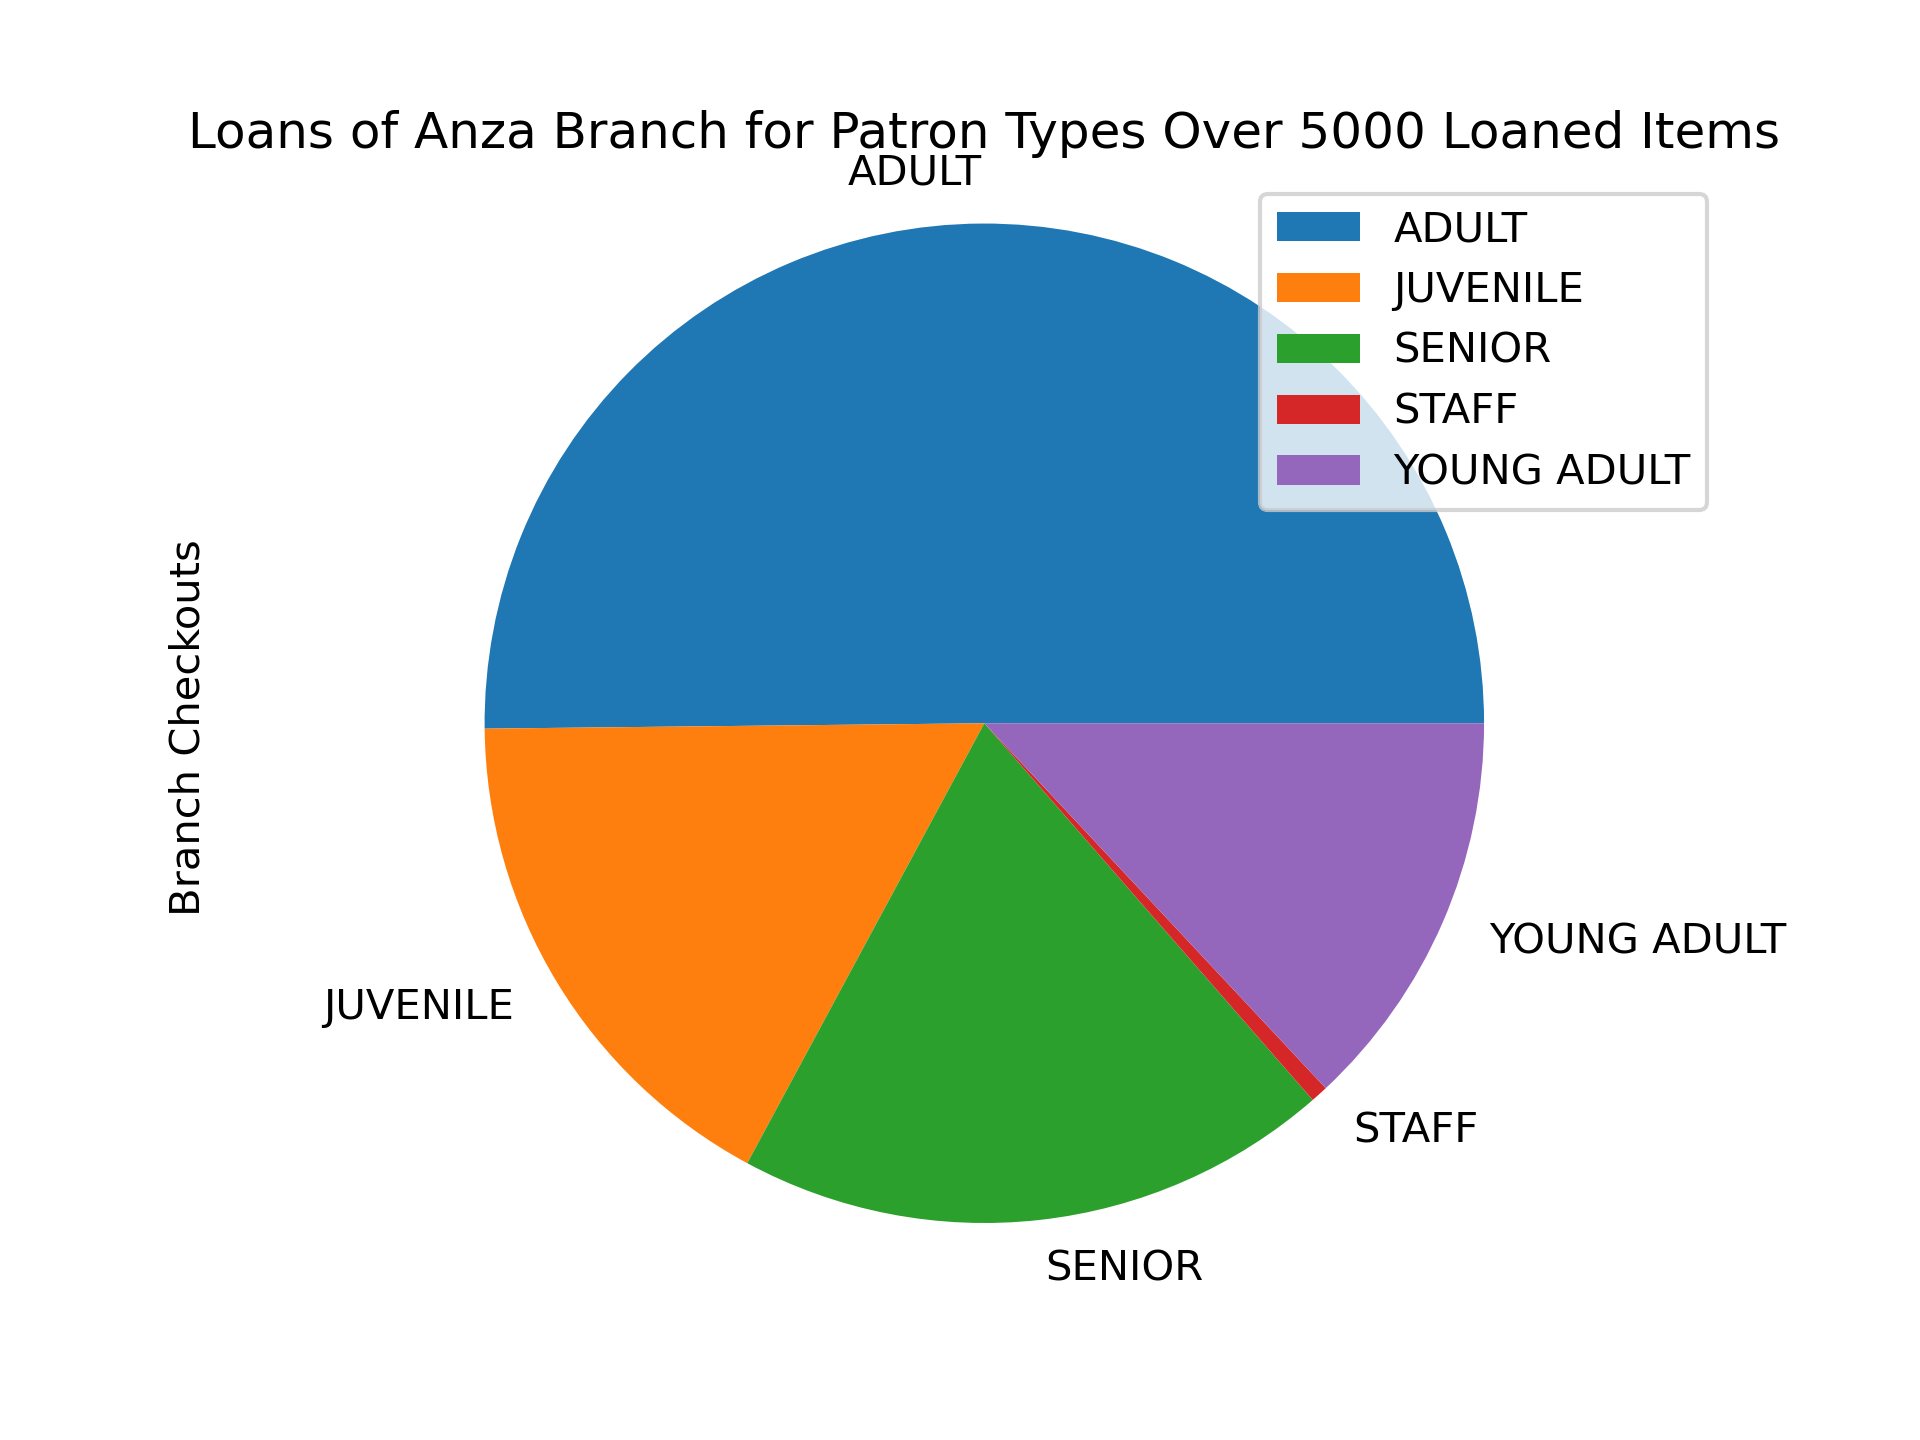

In [111]:
# Make a variable called branch and store a 'Home Library Definition' in it
branch = "Anza"

# Make a variable called min_checkouts that you can change depending on how busy the library branch you've chosen is
min_checkouts = 5000

# Collect the loans of the branch above
just_one_branch = sum_it_up.loc[branch]

# filter the data to patron types with greater than the value set for min_checkouts
just_one_branch = just_one_branch.loc[just_one_branch['Total Checkouts']>min_checkouts,:]

# Create a pie chart based upon the total checkouts (or loans) of that single branch
branch_pie = just_one_branch.plot(kind="pie", y='Total Checkouts', title=("Loans of " + branch + 
                                                                          " Branch for Patron Types Over "
                                                                         + str(min_checkouts) + " Loaned Items"))
branch_pie.set_ylabel("Branch Checkouts")

plt.axis("equal")
plt.show()

# ===========================

# Break (10 mins)

# ===========================

### 2.06 Student Do: Miles per Gallon: Scatter Plot (10 min)

# Miles Per Gallon

In this activity, you will create a scatter plot by using vehicle data, Pandas, and Matplotlib.

## Instructions

Create a scatter plot by using the [data provided](06-Stu_MilesPerGallon-ScatterPlot/Resources/mpg.csv), Pandas, and Matplotlib, that compares the miles per gallon of a vehicle with its horsepower. Use the following image as guidance:

![MPG_example_plot](06-Stu_MilesPerGallon-ScatterPlot/Images/06-MPG_Output.png)

## References

[Auto MPG Dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

- - -

In [123]:
%matplotlib notebook

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [125]:
car_data = pd.read_csv('06-Stu_MilesPerGallon-ScatterPlot/Resources/mpg.csv')
car_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [126]:
# Remove the rows with missing values in horsepower
car_data = car_data.loc[car_data['horsepower'] != "?"]
car_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [127]:
# Set the 'car name' as our index
car_data = car_data.set_index('car name')

# Remove the 'origin' column
del car_data['origin']

car_data.head()

mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  
car name                                             
chevrolet chevelle malibu          12.0          70  
buick skylark 320                  11.5          70  
plymouth satellite                 11.0          70  
amc rebel sst                      12.0          70  
ford torino                        10.5          70

In [128]:
# Convert the "horsepower" column to numeric so the data can be used
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'])

<IPython.core.display.Javascript object>


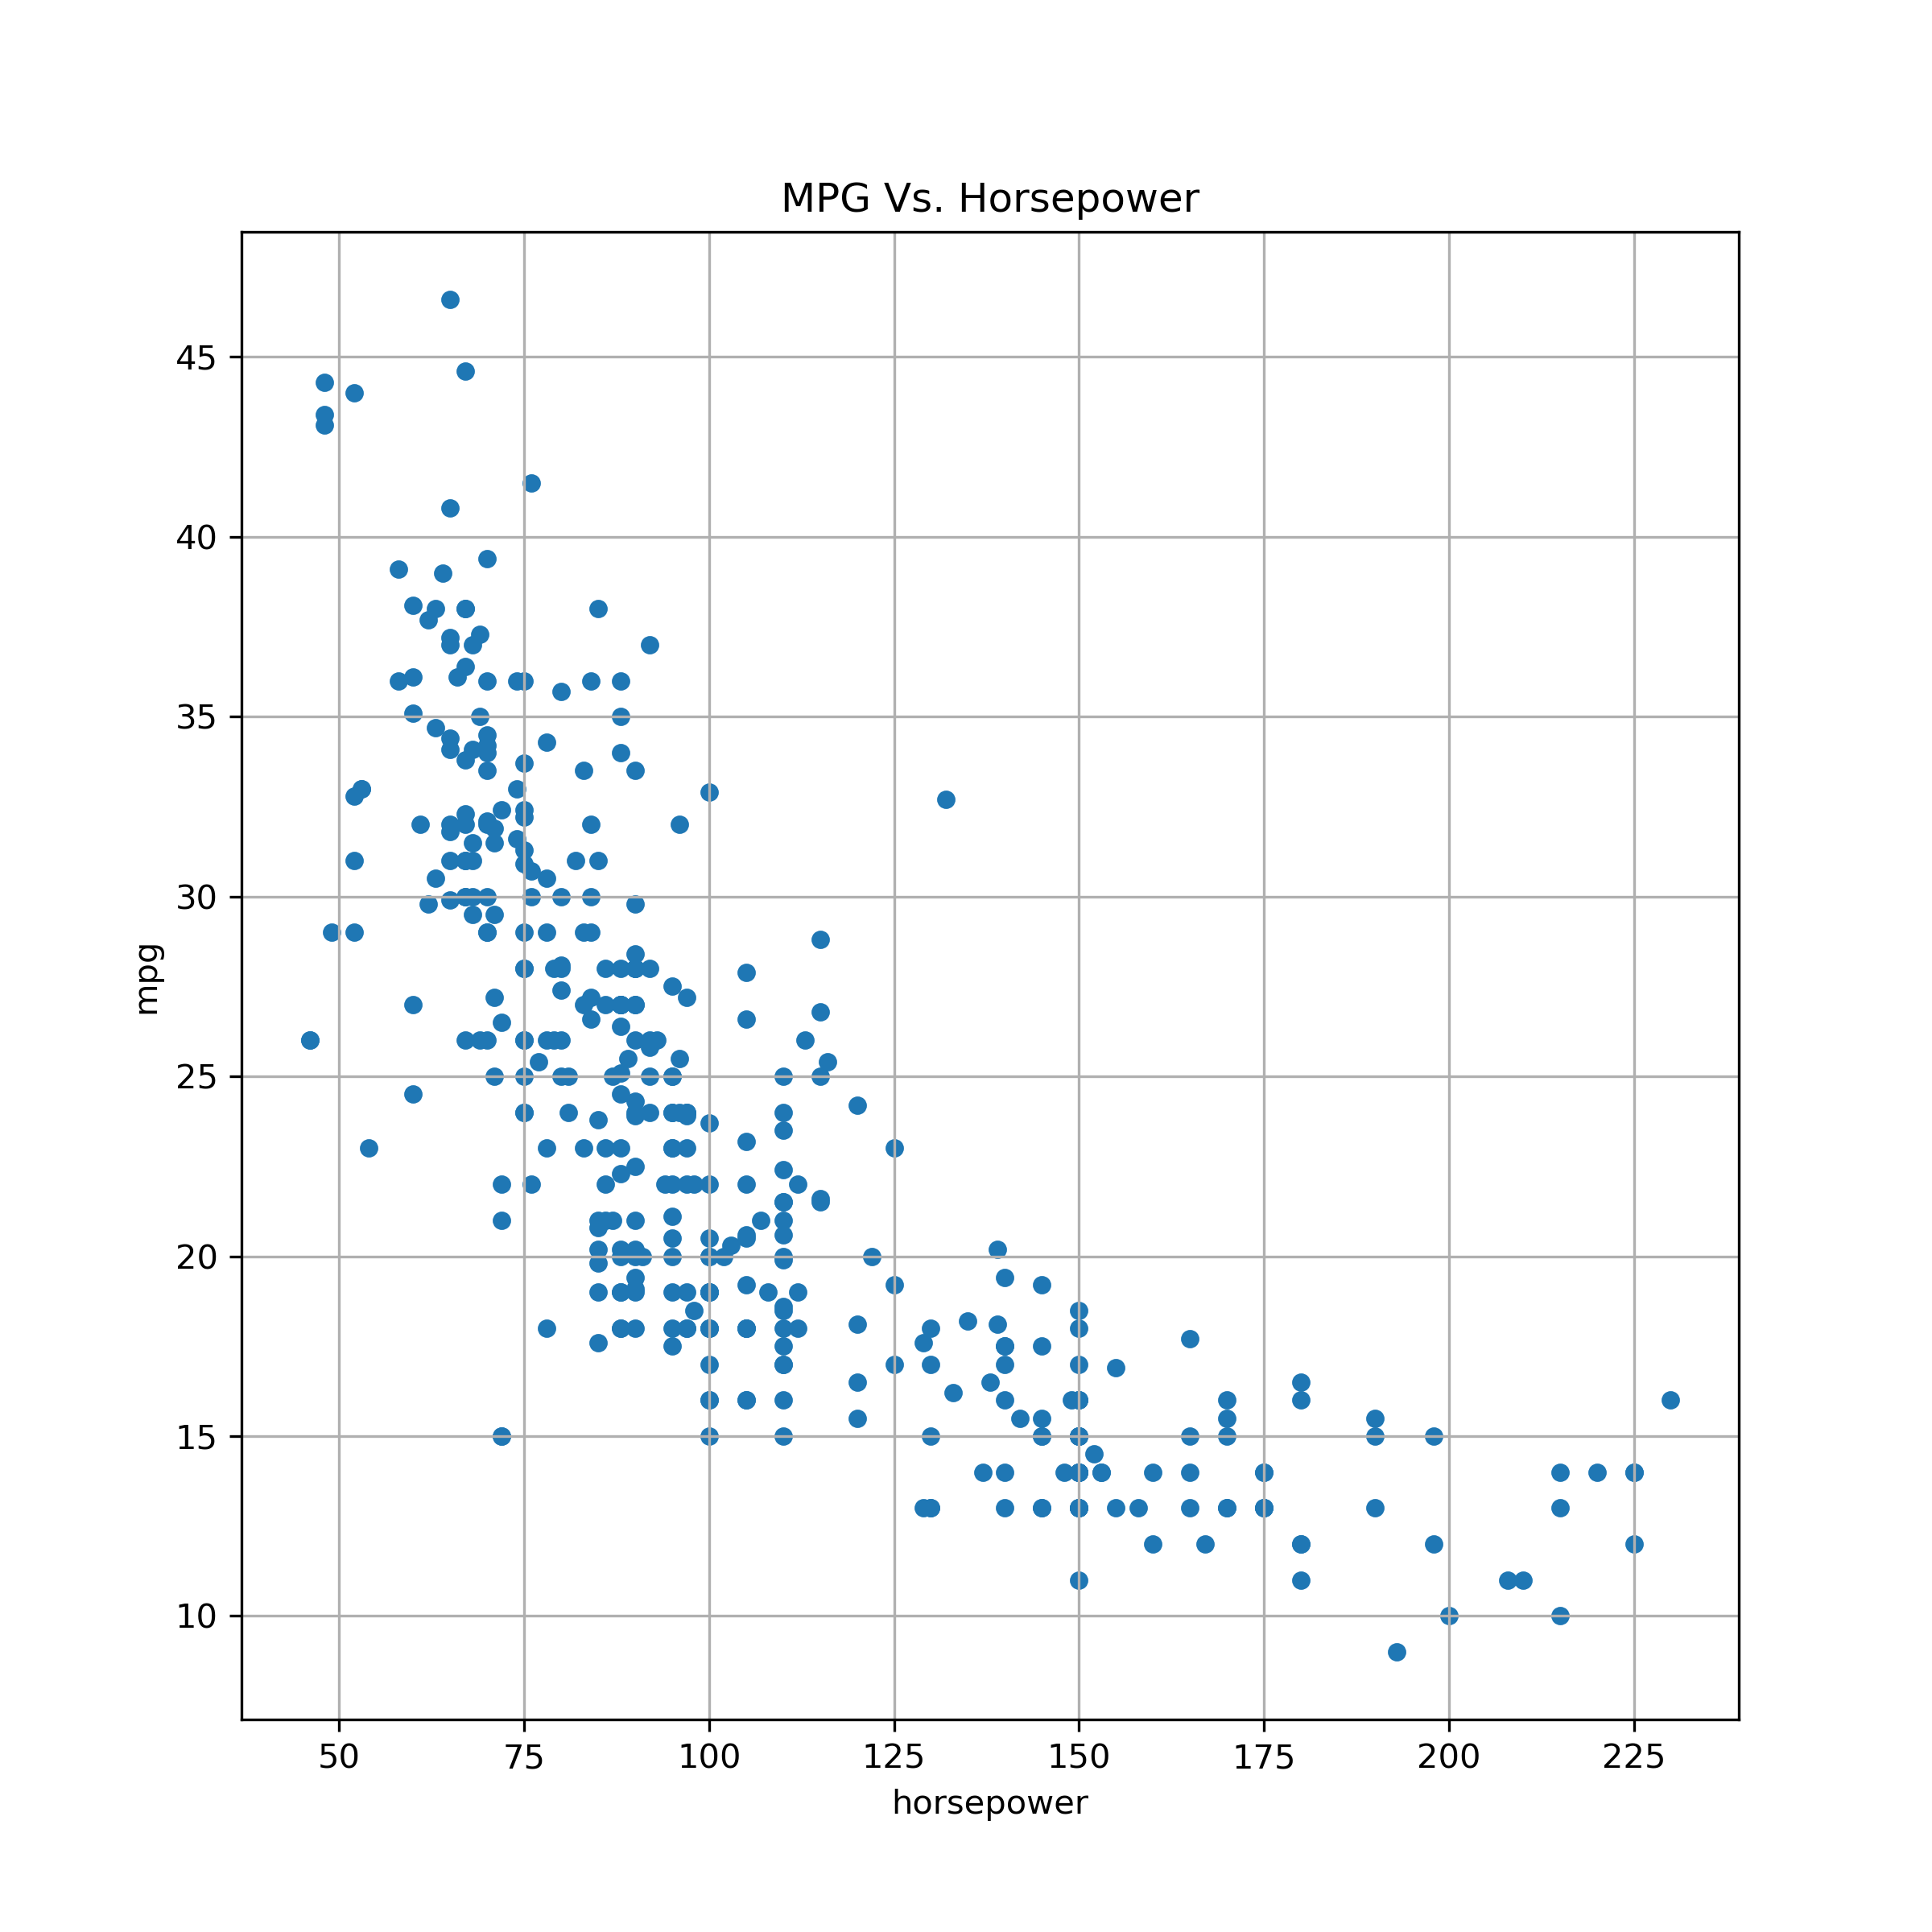

In [129]:
# Create a scatter plot which compares MPG to horsepower
car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(8,8),
              title="MPG Vs. Horsepower")
plt.show()


In [130]:
car_data.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model year        0.290316    1.000000

# ===========================

### 2.07 Instructor Do: Plotting Multiple Lines (0:05)

In [145]:
%matplotlib notebook

In [146]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [147]:
# Read CSV
unemployed_data_one = pd.read_csv("07-Ins_PandasMultiLine/Resources/unemployment_2010-2015.csv")
unemployed_data_two = pd.read_csv("07-Ins_PandasMultiLine/Resources/unemployment_2016-2020.csv")
# del unemployed_data_one['Country Code']

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

Country Name Country Code_x       2010       2011  \
0  Africa Eastern and Southern            AFE   6.879694   6.730720   
1                  Afghanistan            AFG  11.520000  11.510000   
2   Africa Western and Central            AFW   4.471161   4.466731   
3                       Angola            AGO   9.430000   7.360000   
4                      Albania            ALB  14.090000  13.480000   

        2012       2013       2014       2015 Country Code_y       2016  \
0   6.578243   6.480673   6.414462   6.468598            AFE   6.546351   
1  11.520000  11.540000  11.450000  11.390000            AFG  11.310000   
2   4.560139   4.356187   4.640632   4.547113            AFW   5.486480   
3   7.370000   7.380000   7.310000   7.260000            AGO   7.200000   
4  13.380000  15.870000  18.060000  17.190000            ALB  15.420000   

        2017       2018       2019       2020  
0   6.523061   6.414392   6.472269   6.814177  
1  11.180000  11.060000  10.980000  11.730000  
2   5.927104   5.910615   5.928926   6.300105  
3   7.100000   7.000000   6.930000   7.700000  
4  13.620000  12.300000  11.470000  11.700000

In [148]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()

Country Name Country Code       2010       2011       2012  \
0  Africa Eastern and Southern          AFE   6.879694   6.730720   6.578243   
1                  Afghanistan          AFG  11.520000  11.510000  11.520000   
2   Africa Western and Central          AFW   4.471161   4.466731   4.560139   
3                       Angola          AGO   9.430000   7.360000   7.370000   
4                      Albania          ALB  14.090000  13.480000  13.380000   

        2013       2014       2015       2016       2017       2018  \
0   6.480673   6.414462   6.468598   6.546351   6.523061   6.414392   
1  11.540000  11.450000  11.390000  11.310000  11.180000  11.060000   
2   4.356187   4.640632   4.547113   5.486480   5.927104   5.910615   
3   7.380000   7.310000   7.260000   7.200000   7.100000   7.000000   
4  15.870000  18.060000  17.190000  15.420000  13.620000  12.300000   

        2019       2020  
0   6.472269   6.814177  
1  10.980000  11.730000  
2   5.928926   6.300105  
3   6.930000   7.700000  
4  11.470000  11.700000

In [149]:
# Set the 'Country Code' to be our index for easy referencing of rows
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

In [150]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_unemployed_data.mean()
average_unemployment

C:\Users\k\AppData\Local\Temp\ipykernel_37248\1422443258.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_unemployment = combined_unemployed_data.mean()


2010    7.949476
2011    7.864397
2012    7.883905
2013    7.903511
2014    7.730817
2015    7.617846
2016    7.527750
2017    7.260905
2018    6.988844
2019    6.836369
2020    7.981232
dtype: float64

In [151]:
# Collect the years where data was collected
years = average_unemployment.keys()

<IPython.core.display.Javascript object>


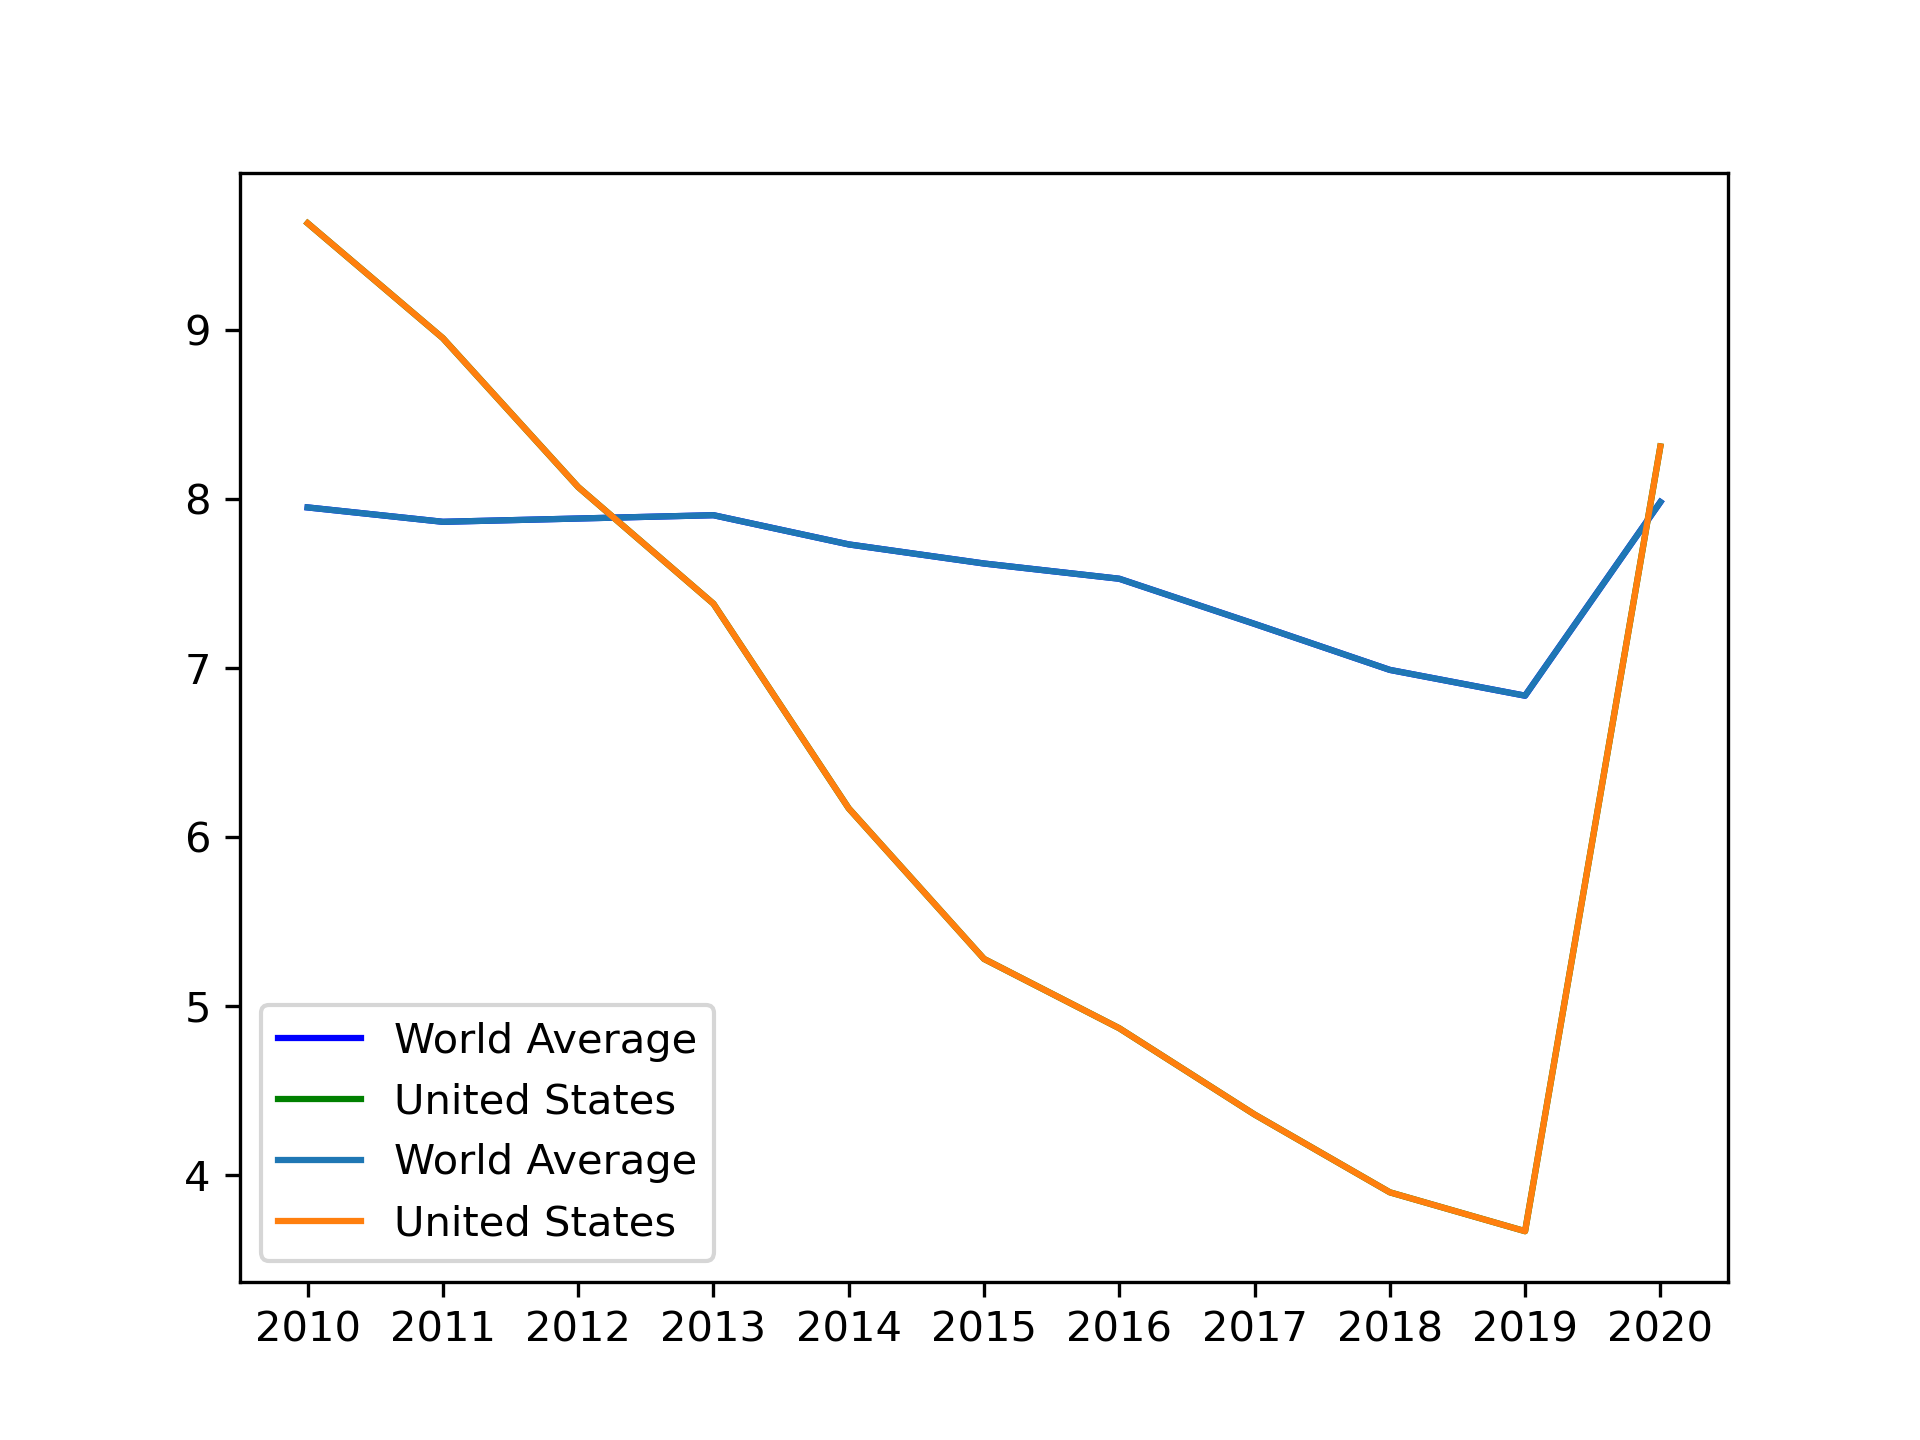

In [143]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
                                                                  "2016","2017","2018","2019","2020"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

<IPython.core.display.Javascript object>


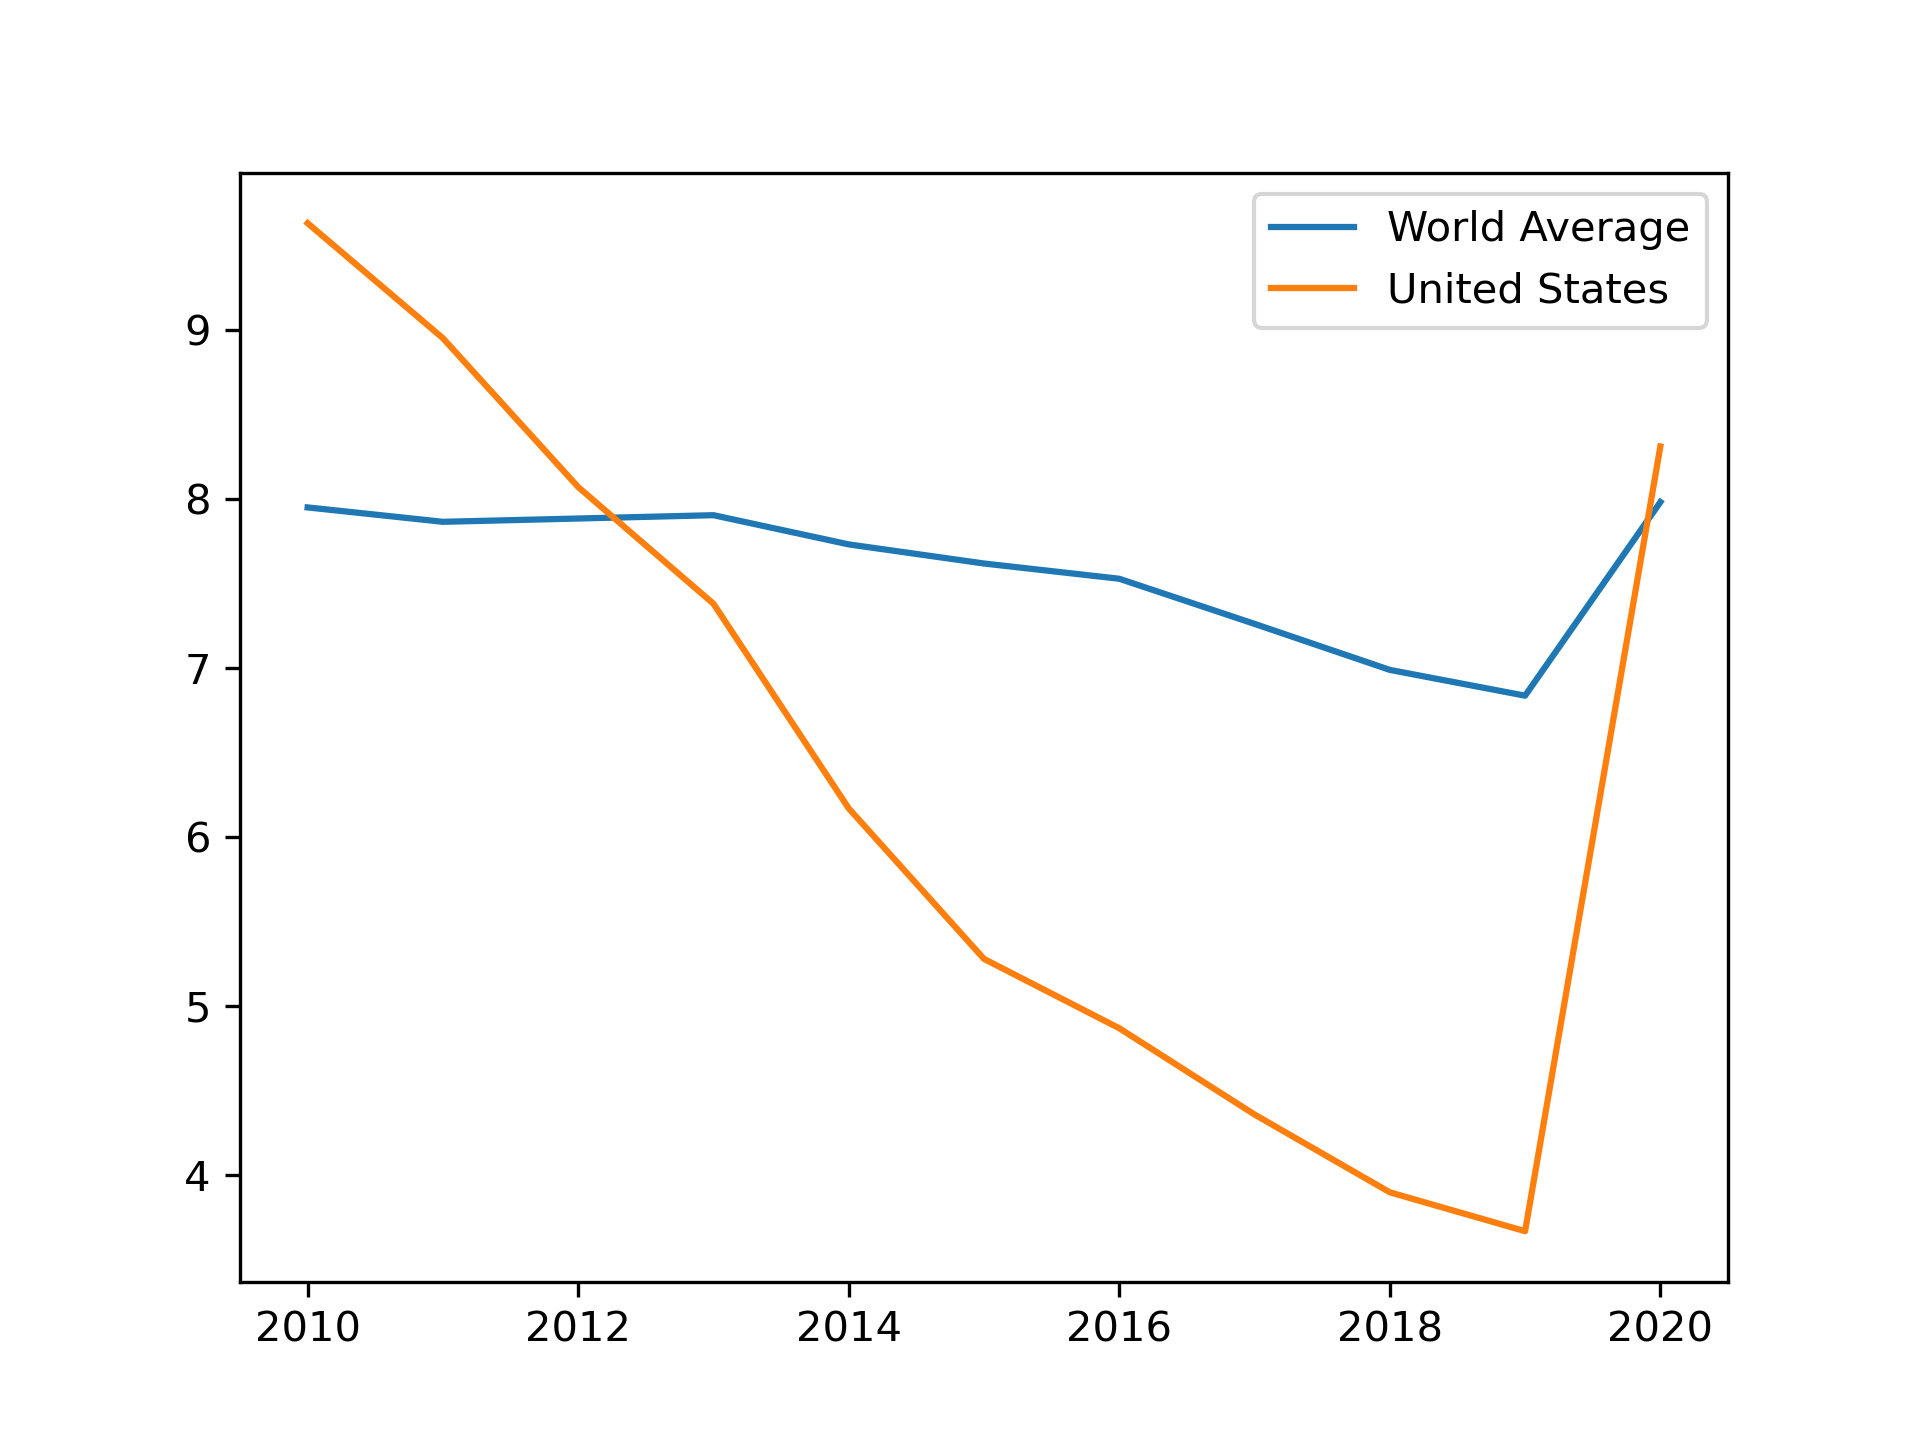

In [152]:
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2020"].plot(label="United States")
plt.legend()
plt.show()

# ===========================

### 2.08 Student Do: Traveling Companions, Part 1 (20 min)

# Traveling Companions, Part 1

This is Part 1 of a three-part mini-project.

In this first part of the activity, you will take three separate CSVs that were gathered from Tourism Malaysia, merge them together, and then create charts to visualize a comparison of travelers to Malaysia from different countries of origin over three years.

## Instructions

* Check the comments in each cell of this [Jupyter Notebook file](Unsolved/traveling_companions.ipynb) for activity instructions.

* Your final table should align with the following table:

   ![Merged Table.](08-Stu_Travel-Part1/Images/08-TravelingCompanion_Output.png)

## References

[Tourism Malaysia](https://www.data.gov.my/data/en_US/dataset/travelling-companion)

- - -

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
# Take in all of our traveler data and read it into pandas
travel_2016 = "08-Stu_Travel-Part1/Resources/2016_travelers.csv"
travel_2017 = "08-Stu_Travel-Part1/Resources/2017_travelers.csv"
travel_2018 = "08-Stu_Travel-Part1/Resources/2018_travelers.csv"

travel_2016_df = pd.read_csv(travel_2016)
travel_2017_df = pd.read_csv(travel_2017)
travel_2018_df = pd.read_csv(travel_2018)


In [79]:
# Merge the first two datasets on "COUNTRY OF NATIONALITY" so that no data is lost (should be 44 rows)
combined_travel_df = pd.merge(travel_2016_df, travel_2017_df,
                                 how='outer', on='COUNTRY OF NATIONALITY')
combined_travel_df.head()

COUNTRY OF NATIONALITY  ALONE_x  WITH SPOUSE_x  WITH CHILDREN_x  \
0              SINGAPORE     18.6           35.5              3.9   
1               THAILAND     30.1           16.7              0.9   
2              INDONESIA     12.9           24.6              3.8   
3                 BRUNEI     10.2           24.9              2.2   
4            PHILIPPINES     13.9           27.5              1.5   

   WITH FAMILY/RELATIVES_x  STUDENT GROUP_x  WITH FRIENDS_x  \
0                     23.7              0.1            14.7   
1                     12.0              3.1            30.2   
2                     37.9              0.9            14.9   
3                     44.5              0.0            16.2   
4                     15.0              5.5            34.1   

   WITH BUSINESS ACCOCIATE_x  WITH INCENTIVE GROUP_x  OTHERS_x  ALONE_y  \
0                        2.2                     0.4       0.8     20.6   
1                        4.8                     1.0       1.2     23.2   
2                        2.1                     1.6       1.2     10.4   
3                        1.1                     0.1       0.7      6.8   
4                        1.1                     0.0       1.5      3.5   

   WITH SPOUSE_y  WITH CHILDREN_y  WITH FAMILY/RELATIVES_y  STUDENT GROUP_y  \
0           39.4              5.9                     22.9              0.2   
1           17.8              4.2                     11.8              4.4   
2           28.0              3.9                     34.9              0.9   
3           21.2              2.2                     54.5              0.1   
4            7.6              0.2                     40.0              0.2   

   WITH FRIENDS_y  WITH BUSINESS ACCOCIATE_y  WITH INCENTIVE GROUP_y  OTHERS_y  
0             9.3                        1.1                     0.1       0.5  
1            29.3                        4.8                     2.7       1.8  
2            15.5                        2.7                     2.3       1.4  
3            14.2                        0.8                     0.0       0.0  
4            46.4                        1.9                     0.1       0.2

In [80]:
# Rename our _x columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"

combined_travel_df = combined_travel_df.rename(columns={"ALONE_x":"2016 Alone",
                                                        "WITH SPOUSE_x":"2016 With Spouse",
                                                        "WITH CHILDREN_x":"2016 With Children",
                                                        "WITH FAMILY/RELATIVES_x":"2016 With Family/Relatives",
                                                        "STUDENT GROUP_x":"2016 Student Group",
                                                        "WITH FRIENDS_x":"2016 With Friends",
                                                        "WITH BUSINESS ACCOCIATE_x":"2016 With Business Associate",
                                                        "WITH INCENTIVE GROUP_x":"2016 With Incentive Group",
                                                        "OTHERS_x":"2016 Others"})

# Rename our _y columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"
combined_travel_df = combined_travel_df.rename(columns={"ALONE_y":"2017 Alone",
                                                        "WITH SPOUSE_y":"2017 With Spouse",
                                                        "WITH CHILDREN_y":"2017 With Children",
                                                        "WITH FAMILY/RELATIVES_y":"2017 With Family/Relatives",
                                                        "STUDENT GROUP_y":"2017 Student Group",
                                                        "WITH FRIENDS_y":"2017 With Friends",
                                                        "WITH BUSINESS ACCOCIATE_y":"2017 With Business Associate",
                                                        "WITH INCENTIVE GROUP_y":"2017 With Incentive Group",
                                                        "OTHERS_y":"2017 Others"})

combined_travel_df.head()

COUNTRY OF NATIONALITY  2016 Alone  2016 With Spouse  2016 With Children  \
0              SINGAPORE        18.6              35.5                 3.9   
1               THAILAND        30.1              16.7                 0.9   
2              INDONESIA        12.9              24.6                 3.8   
3                 BRUNEI        10.2              24.9                 2.2   
4            PHILIPPINES        13.9              27.5                 1.5   

   2016 With Family/Relatives  2016 Student Group  2016 With Friends  \
0                        23.7                 0.1               14.7   
1                        12.0                 3.1               30.2   
2                        37.9                 0.9               14.9   
3                        44.5                 0.0               16.2   
4                        15.0                 5.5               34.1   

   2016 With Business Associate  2016 With Incentive Group  2016 Others  \
0                           2.2                        0.4          0.8   
1                           4.8                        1.0          1.2   
2                           2.1                        1.6          1.2   
3                           1.1                        0.1          0.7   
4                           1.1                        0.0          1.5   

   2017 Alone  2017 With Spouse  2017 With Children  \
0        20.6              39.4                 5.9   
1        23.2              17.8                 4.2   
2        10.4              28.0                 3.9   
3         6.8              21.2                 2.2   
4         3.5               7.6                 0.2   

   2017 With Family/Relatives  2017 Student Group  2017 With Friends  \
0                        22.9                 0.2                9.3   
1                        11.8                 4.4               29.3   
2                        34.9                 0.9               15.5   
3                        54.5                 0.1               14.2   
4                        40.0                 0.2               46.4   

   2017 With Business Associate  2017 With Incentive Group  2017 Others  
0                           1.1                        0.1          0.5  
1                           4.8                        2.7          1.8  
2                           2.7                        2.3          1.4  
3                           0.8                        0.0          0.0  
4                           1.9                        0.1          0.2

In [81]:
# Merge our newly combined dataframe with the 2018 dataframe
combined_travel_df = pd.merge(combined_travel_df, travel_2018_df, how="outer", on="COUNTRY OF NATIONALITY")
combined_travel_df

COUNTRY OF NATIONALITY  2016 Alone  2016 With Spouse  2016 With Children  \
0               SINGAPORE        18.6              35.5                 3.9   
1                THAILAND        30.1              16.7                 0.9   
2               INDONESIA        12.9              24.6                 3.8   
3                  BRUNEI        10.2              24.9                 2.2   
4             PHILIPPINES        13.9              27.5                 1.5   
5                 VIETNAM         5.8              11.5                 0.6   
6                   CHINA         4.2              30.9                 0.7   
7                   JAPAN        10.9              26.5                 0.6   
8             SOUTH KOREA         9.4              36.3                 0.6   
9                  TAIWAN         7.8              55.7                 1.2   
10                  INDIA         5.9              30.1                 1.3   
11               PAKISTAN        12.3              21.3                 1.3   
12           SAUDI ARABIA         3.3              53.9                 0.4   
13   UNITED ARAB EMIRATES        11.6              51.2                 4.7   
14                   OMAN        11.3              35.5                 1.6   
15                 KUWAIT         0.0              75.0                 0.0   
16                   IRAN         3.5              18.9                 0.2   
17                 CANADA        27.6              38.7                 1.1   
18                    USA        29.5              40.8                 0.7   
19         UNITED KINGDOM        23.0              42.7                 0.4   
20                IRELAND        25.3              44.8                 1.1   
21                 SWEDEN        12.4              47.9                 1.3   
22                DENMARK        11.9              31.9                 3.0   
23                FINLAND        20.1              41.5                 2.5   
24                 NORWAY        18.6              47.5                 0.0   
25                  ITALY        15.0              40.9                 0.8   
26                  SPAIN        14.2              41.6                 0.4   
27                 FRANCE        19.4              40.0                 0.9   
28                BELGIUM        31.2              19.4                 2.2   
29            NETHERLANDS        17.5              34.6                 1.9   
30                GERMANY        19.3              42.1                 0.5   
31            SWITZERLAND        21.3              44.3                 0.9   
32                 RUSSIA        28.6              26.5                 1.6   
33              AUSTRALIA        18.3              45.8                 0.7   
34            NEW ZEALAND        11.4              43.4                 0.3   
35           SOUTH AFRICA        39.7              37.0                 0.0   
36           CENTRAL ASIA        11.4              23.8                 0.9   
37            OTHER ASEAN        31.4               5.7                 0.0   
38        OTHER EAST ASIA         0.0               0.0                 0.0   
39      OTHERS SOUTH ASIA         2.7              15.3                 2.7   
40       OTHERS WEST ASIA         9.3              29.0                 1.4   
41        OTHERS AMERICAS        28.5              36.3                 3.4   
42          OTHERS EUROPE        23.2              39.9                 0.6   
43                 OTHERS        16.7              27.5                 1.3   

    2016 With Family/Relatives  2016 Student Group  2016 With Friends  \
0                         23.7                 0.1               14.7   
1                         12.0                 3.1               30.2   
2                         37.9                 0.9               14.9   
3                         44.5                 0.0               16.2   
4                         15.0                 5.5               34.1   
5        

In [82]:
# Rename "ALONE", "WITH SPOUSE", "WITH CHILDREN", "WITH FAMILY/RELATIVES", "STUDENT GROUP", "WITH FRIENDS",
# "WITH BUSINESS ACCOCIATE","WITH INCENTIVE GROUP", "OTHERS" to 
# "2018 Alone", "2018 With Spouse", "2018 With Children", "2018 With Family/Relatives", "2018 Student Group", 
# "2018 With Friends", "2018 With Business Associate", "2018 With Incentive Group", and "2018 Others"
combined_travel_df = combined_travel_df.rename(columns={"ALONE":"2018 Alone",
                                                        "WITH SPOUSE":"2018 With Spouse",
                                                        "WITH CHILDREN":"2018 With Children",
                                                        "WITH FAMILY/RELATIVES":"2018 With Family/Relatives",
                                                        "STUDENT GROUP":"2018 Student Group",
                                                        "WITH FRIENDS":"2018 With Friends",
                                                        "WITH BUSINESS ACCOCIATE":"2018 With Business Associate",
                                                        "WITH INCENTIVE GROUP":"2018 With Incentive Group",
                                                        "OTHERS":"2018 Others"})

combined_travel_df.head()

COUNTRY OF NATIONALITY  2016 Alone  2016 With Spouse  2016 With Children  \
0              SINGAPORE        18.6              35.5                 3.9   
1               THAILAND        30.1              16.7                 0.9   
2              INDONESIA        12.9              24.6                 3.8   
3                 BRUNEI        10.2              24.9                 2.2   
4            PHILIPPINES        13.9              27.5                 1.5   

   2016 With Family/Relatives  2016 Student Group  2016 With Friends  \
0                        23.7                 0.1               14.7   
1                        12.0                 3.1               30.2   
2                        37.9                 0.9               14.9   
3                        44.5                 0.0               16.2   
4                        15.0                 5.5               34.1   

   2016 With Business Associate  2016 With Incentive Group  2016 Others  ...  \
0                           2.2                        0.4          0.8  ...   
1                           4.8                        1.0          1.2  ...   
2                           2.1                        1.6          1.2  ...   
3                           1.1                        0.1          0.7  ...   
4                           1.1                        0.0          1.5  ...   

   2017 Others  2018 Alone  2018 With Spouse  2018 With Children  \
0          0.5        16.9              34.6                 5.0   
1          1.8        20.6               6.7                 7.2   
2          1.4        11.3              31.1                 4.0   
3          0.0        17.5              28.1                 2.0   
4          0.2         5.5              20.6                 0.7   

   2018 With Family/Relatives  2018 Student Group  2018 With Friends  \
0                        25.3                 0.7               14.4   
1                        33.5                 1.2               29.8   
2                        34.4                 1.1               14.7   
3                        40.0                 0.1               11.6   
4                        29.5                 0.5               39.2   

   2018 With Business Associate  2018 With Incentive Group  2018 Others  
0                           0.6                        2.5          0.1  
1                           0.4                        0.4          0.2  
2                           0.7                        2.3          0.5  
3                           0.4                        0.1          0.1  
4                           1.6                        1.6          0.7  

[5 rows x 28 columns]

# ===========================

### 2.09 Student Do: Traveling Companions, Part 2 (5 min)

# Traveling Companions, Part 2

This is Part 2 of a three-part mini-project.

In this second part, you will examine the averages of each column and reduce the DataFrame to include only types of companion travelers that are above 1% across all three years.

## Instructions

* Check the comments in each cell of this [Jupyter Notebook file](Unsolved/traveling_companions.ipynb) for activity instructions.

* Your final table should align with the following table:

   ![Companion Output.](09-Stu_Travel-Part2/Images/09-TravelingCompanion2_Output.png)


## References

[Tourism Malaysia](https://www.data.gov.my/data/en_US/dataset/travelling-companion)


- - -

In [83]:
# Check the mean of the columns
combined_travel_df.mean()

C:\Users\k\AppData\Local\Temp\ipykernel_37248\3809963790.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_travel_df.mean()


2016 Alone                      15.890909
2016 With Spouse                34.202273
2016 With Children               1.275000
2016 With Family/Relatives      20.434091
2016 Student Group               0.715909
2016 With Friends               20.300000
2016 With Business Associate     3.088636
2016 With Incentive Group        1.065909
2016 Others                      0.768182
2017 Alone                      12.447727
2017 With Spouse                32.413636
2017 With Children               1.184091
2017 With Family/Relatives      27.325000
2017 Student Group               0.647727
2017 With Friends               22.202273
2017 With Business Associate     1.663636
2017 With Incentive Group        0.995455
2017 Others                      1.106818
2018 Alone                       7.477273
2018 With Spouse                31.693182
2018 With Children               1.325000
2018 With Family/Relatives      28.638636
2018 Student Group               1.179545
2018 With Friends               25

In [84]:
# Reduce columns where mean of traveling companions is > 1 across all years
travel_reduced = pd.DataFrame(combined_travel_df[["COUNTRY OF NATIONALITY",
                                                  "2016 Alone","2016 With Spouse","2016 With Children",
                                                  "2016 With Family/Relatives","2016 With Friends",
                                                  "2016 With Business Associate","2017 Alone",
                                                  "2017 With Spouse","2017 With Children",
                                                  "2017 With Family/Relatives","2017 With Friends",
                                                  "2017 With Business Associate","2018 Alone",
                                                  "2018 With Spouse","2018 With Children",
                                                  "2018 With Family/Relatives","2018 With Friends",
                                                  "2018 With Business Associate"]])

# Set index to "Country of Nationality"
travel_reduced = travel_reduced.set_index("COUNTRY OF NATIONALITY")
travel_reduced

2016 Alone  2016 With Spouse  2016 With Children  \
COUNTRY OF NATIONALITY                                                     
SINGAPORE                     18.6              35.5                 3.9   
THAILAND                      30.1              16.7                 0.9   
INDONESIA                     12.9              24.6                 3.8   
BRUNEI                        10.2              24.9                 2.2   
PHILIPPINES                   13.9              27.5                 1.5   
VIETNAM                        5.8              11.5                 0.6   
CHINA                          4.2              30.9                 0.7   
JAPAN                         10.9              26.5                 0.6   
SOUTH KOREA                    9.4              36.3                 0.6   
TAIWAN                         7.8              55.7                 1.2   
INDIA                          5.9              30.1                 1.3   
PAKISTAN                      12.3              21.3                 1.3   
SAUDI ARABIA                   3.3              53.9                 0.4   
UNITED ARAB EMIRATES          11.6              51.2                 4.7   
OMAN                          11.3              35.5                 1.6   
KUWAIT                         0.0              75.0                 0.0   
IRAN                           3.5              18.9                 0.2   
CANADA                        27.6              38.7                 1.1   
USA                           29.5              40.8                 0.7   
UNITED KINGDOM                23.0              42.7                 0.4   
IRELAND                       25.3              44.8                 1.1   
SWEDEN                        12.4              47.9                 1.3   
DENMARK                       11.9              31.9                 3.0   
FINLAND                       20.1              41.5                 2.5   
NORWAY                        18.6              47.5                 0.0   
ITALY                         15.0              40.9                 0.8   
SPAIN                         14.2              41.6                 0.4   
FRANCE                        19.4              40.0                 0.9   
BELGIUM                       31.2              19.4                 2.2   
NETHERLANDS                   17.5              34.6                 1.9   
GERMANY                       19.3              42.1                 0.5   
SWITZERLAND                   21.3              44.3                 0.9   
RUSSIA                        28.6              26.5                 1.6   
AUSTRALIA                     18.3              45.8                 0.7   
NEW ZEALAND                   11.4              43.4                 0.3   
SOUTH AFRICA                  39.7              37.0                 0.0   
CENTRAL ASIA                  11.4              23.8                 0.9   
OTHER ASEAN                   31.4               5.7                 0.0   
OTHER EAST ASIA                0.0               0.0                 0.0   
OTHERS SOUTH ASIA              2.7              15.3                 2.7   
OTHERS WEST ASIA               9.3              29.0                 1.4   
OTHERS AMERICAS               28.5              36.3                 3.4   
OTHERS EUROPE                 23.2              39.9                 0.6   
OTHERS                        16.7              27.5                 1.3   

                        2016 With Family/Relatives  2016 With Friends  \
COUNTRY OF NATIONALITY                                                  
SINGAPORE                                     23.7               14.7   
THAILAND                                      12.0               30.2   
INDONESIA                                     37.9               14.9   
BRUNEI                                        44.5               16.2   
PHILIPPINES                                   15.0               34.1   
VIETNAM         

# ===========================

### 2.10 Student Do: Traveling Companions, Part 3 (15 min)

# Traveling Companions, Part 3

This is the third and final part of a three-part mini-project.

In this final part, you will take the DataFrame you created and, using Matplotlib, chart a comparison of three different countries for one type of traveling companion between 2016 and 2018.

## Instructions

* Check the comments in each cell of this [Jupyter Notebook file](Unsolved/traveling_companions.ipynb) for activity instructions.

* Your output should align with the following figure, depending on the user’s input variable:

   ![outcome.](10-Stu_Travel-Part3/Images/10-TravelCompanion_Output.png)

## Bonus

Try to modify the notebook file so that it will request user input for the 3 country variables and the traveling companion type.

## References

[Tourism Malaysia](https://www.data.gov.my/data/en_US/dataset/travelling-companion)

- - -

In [ ]:
# Create a variable for each country to chart
country1 = "USA"
country2 = "THAILAND"
country3 = "PHILIPPINES"

In [ ]:
# Set type of traveling companion
columns_to_compare = "With Spouse"

In [ ]:
# Create a Series for each chosen country that looks for the chosen travel companion from 2016 to 2018
country1_traveler_over_time = travel_reduced.loc[country1,
                                                [f"2016 {columns_to_compare}",
                                                 f"2017 {columns_to_compare}", 
                                                 f"2018 {columns_to_compare}"]]

country2_traveler_over_time = travel_reduced.loc[country2,
                                                [f"2016 {columns_to_compare}",
                                                 f"2017 {columns_to_compare}", 
                                                 f"2018 {columns_to_compare}"]]

country3_traveler_over_time = travel_reduced.loc[country3,
                                                [f"2016 {columns_to_compare}",
                                                 f"2017 {columns_to_compare}", 
                                                 f"2018 {columns_to_compare}"]]

In [ ]:
# Create a list of the years that we will use as our x axis
years = [2016,2017,2018]

# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(years, country1_traveler_over_time, color="green", label=country1)

# Plot our line that will be used to track the second country's traveling companion percentage over the years
plt.plot(years, country2_traveler_over_time, color="blue", label=country2)

# Plot our line that will be used to track the third country's traveling companion percentage over the years
plt.plot(years, country3_traveler_over_time, color="orange", label=country3)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Traveling " + columns_to_compare + " Country Comparison")
plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("% Travelers")

# Print our chart to the screen
plt.show()

# Bonus

In [ ]:
# Collect the user's input to search through our data frame
country1 = input("What country would you like to chart 1st? ")
country2 = input("What country would you like to chart 2nd? ")
country3 = input("What country would you like to chart 3rd? ")


In [ ]:
# Ask type of traveling companion
select_options = "1 - Alone\n2 - With Spouse\n3 - With Children\n4 - With Family/Relatives\n5 - With Friends\n6 - With Business Associate"
print("What type of traveling companion would you like to chart? ")
print(select_options)

traveler_type = int(input("Choose a number:  "))

# Boolean to check if number was correctly chosen
selected = False

# Loop through options to set column name according to chosen number
while selected == False:
    if traveler_type == 1:
        columns_to_compare = "Alone"
        selected = True
    elif traveler_type == 2:
        columns_to_compare = "With Spouse"
        selected = True
    elif traveler_type == 3:
        columns_to_compare = "With Children"
        selected = True
    elif traveler_type == 4:
        columns_to_compare = "With Family"
        selected = True
    elif traveler_type == 5:
        columns_to_compare = "With Family/Relatives"
        selected = True
    elif traveler_type == 6:
        columns_to_compare = "With Business Associate"
        selected = True
    else:
        # Incorrect input, try again
        print("Please make your selection again.")
        print(select_options)

        traveler_type = int(input("Choose a number:  "))

print("You selected option " + str(traveler_type) + " - " + columns_to_compare)

In [ ]:
# Create a Series for each chosen country that looks for the chosen travel companion from 2016 to 2018
country1_traveler_over_time = travel_reduced.loc[country1.upper(),
                                                [f"2016 {columns_to_compare}",f"2017 {columns_to_compare}", f"2018 {columns_to_compare}"]]

country2_traveler_over_time = travel_reduced.loc[country2.upper(),
                                                [f"2016 {columns_to_compare}",f"2017 {columns_to_compare}", f"2018 {columns_to_compare}"]]

country3_traveler_over_time = travel_reduced.loc[country3.upper(),
                                                [f"2016 {columns_to_compare}",f"2017 {columns_to_compare}", f"2018 {columns_to_compare}"]]



In [ ]:
# Create a list of the years that we will use as our x axis
years = [2016,2017,2018]

# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(years, country1_traveler_over_time, color="green", label=country1)

# Plot our line that will be used to track the second country's traveling companion percentage over the years
plt.plot(years, country2_traveler_over_time, color="blue", label=country2)

# Plot our line that will be used to track the third country's traveling companion percentage over the years
plt.plot(years, country3_traveler_over_time, color="orange", label=country3)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Traveling " + columns_to_compare + " Country Comparison")
plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("% Travelers")

# Print our chart to the screen
plt.show()

# ===========================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "05-Data-Visualization - Day 2 - Plotting With Pandas"
objectives = [
    "Create plots using the `DataFrame.plot()` method",
    "Explain the advantages and disadvantages of creating charts using the `DataFrame.plot()` method",
    "Use Pandas to analyze a complex dataset and chart the visualizations",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))